# Theory of Data Visualization

Visualization is meant to convey information.

> The power of a graph is its ability to enable one to take in the quantitative information, organize it, and see patterns and structure not readily revealed by other means of studying the data.

\- Cleveland and McGill, 1984

Certain techniques make that information easier to interpret and understand. In their 1984 paper titled, "[Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods](https://www-jstor-org.libproxy.berkeley.edu/stable/2288400?seq=1#page_scan_tab_contents)," Cleveland and McGill identify 10 elementary perceptual tasks that are used to "extract quantitative information from graphs." Their premise is:

> A graphical form that involves elementary perceptual tasks that lead to more accurate judgments than another graphical form (with the same quantitative information) will result in better organization and increase the chances of a correct perception of patterns and behavior.

Whereas graph design had, up to that point, been "largely unscientific," Cleveland and McGill took a systematic approach in analyzing human graphical perception through experimentation. Their researched helped identify the most and least accurate elementary perceptual tasks, ordered below:

1. Position along a common scale
2. Position along non-aligned scales
3. Length, direction, angle
4. Area
5. Volume, curvature
6. Shading, color saturation

In 2010, [Heer and Bostock](http://vis.stanford.edu/files/2010-MTurk-CHI.pdf) confirmed these results using Amazon's Mechanical Turk.

Let's take a look at a few examples. Because we're only interested in relative sizes, we don't include a legend with size information or reference points.

![circles](../images/circles.png)

For circles of distinctly different sizes, the comparison is simple. For example, "A" is smaller than "B." However, for circles, such as "L" and "M," that are almost the same size, it's difficult to tell which is smaller. Area, according to Cleveland and McGill's research, is less accurate than, say, length, which we consider next.

![bars](../images/bars.png)

Focusing on "L" and "M," it is clear to see which is larger. You might be wondering whether scale makes a difference&mdash;that is, if the small circle sizes make it difficult to compare. It doesn't.

Next, we consider a case where we want to plot two series. For this example, let's suppose we're working with student English and math test scores. Here, we'll want to use bars, which we arbitrarily label Z-L. The question is, which bars should we use? This is a case where the answer depends on what we're trying to communicate. If we're interested in showing total scores, we could use a stacked bar chart.

![two_bars](../images/two-series-0.png)

We can tell that "Y" and "L" had the highest cumulative scores. What if we want to know which students scored highest on the math exam? Because the math portions of each bar are on "non-aligned scales," as Cleveland and McGill call it, it's difficult to tell. One solution is to plot these on opposite sides of the x-axis.

![two_bars_centered](../images/two-series-1.png)

Now, it's easier to see that "R" scored quite well on the math exam. The tradeoff with this layout is that it's difficult to compare cumulative scores. Comparing "Z" and "O," for example, is a challenge. Again, it depends on what the message is.

These findings are a *guide* for what works when the goal is to make accurate judgments. Sometimes, however, the goal might not be to allow for precise comparisons but, rather, to facilitate the perception of larger patterns.

## Form and Function

> A good graphic realizes two basic goals: It **presents** information, and it allows users to **explore** that information.

\- Alberto Cairo

-------------------------

> A data visualization should only be beautiful when beauty can promote understanding in some way without undermining it in another. Is beauty sometimes useful? Certainly. Is beauty always useful? Certainly not.

\- Stephen Few

-------------------------

> Good displays of data help to reveal knowledge relevant to understanding mechanism, process and dynamics, cause and effect.

\- Edward Tufte

-------------------------

>A figure is ineffective if it "wastes too much real estate (and the designer's time) on things that don't help readers understand [it]." 

\- Alberto Cairo

-------------------------

> The important criterion for a graph is not simply how fast we can see a result; rather it is whether through the use of the graph we can see something that would have been harder to see otherwise or that could not have been seen at all.

\- William Cleveland

-------------------------

> [A]lways take advantage of the space you have available to seek depth within reasonable limits. After that, *and only after that*, worry about how to make the presentation prettier.

\- Alberto Cairo


----------------------

Ultimately, identify your audience and their needs and interests. The same data should be visualized differently for a scientific publication versus a magazine.

# Data Visualization using Python

## Matplotlib

Now, we'll start learning *how* to create visualizations in Python. We'll start by using a popular python package called `matplotlib`, and later on use a second package called `seaborn` that builds on `matplotlib` First we'll import `matplotlib`, along with several other Python packages we'll be using during this workshop.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

One of the nice features of Jupyter notebooks is that figures can be plotted inline, which means they appear below the code cell that creates them. This is not the default behavior however, and so we'll use the below **"Magic"** statement (these statements are added to solve simple problems) to tell the Jupyter notebook to plot the figures inline (instead of opening a separate browser window to show them).

In [2]:
%matplotlib inline

### Import the Data Set

To illustrate what `matplotlib` and `seaborn` can do, we'll need to use a dataset. We've decided to use the so-called Gapminder dataset, which was compiled by Jennifer Bryan. This dataset contains several key demographic and economic statistics for many countries, across many years. For more information, see the [gapminder](https://github.com/jennybc/gapminder) repository.

We'll use the `pandas` Python package to load the `.csv` (comma separated values) file that contains the dataset. The `pandas` package provides `DataFrame` objects that organize datasets in tabular form (think Microsoft Excel spreadsheets). We've created an alias for the `pandas` package, called `pd`, which is the convention. To read in a `.csv` file we simply use `pd.read_csv`. This `.csv` file happens to be tab-delimited, so we need to specify `sep=\t`.

Also, we're going to use the `pyprojroot` package to obtain the correct file path for the dataset (if you've used R, it's very similar to the `here` package). If you have not installed this package, you can do so within the Jupyter notebook:

In [3]:
# Run if you need to install pyprojroot
!pip install pyprojroot

In [4]:
from pyprojroot import here

Then, the `here` function will allow us to easily specify the correct path:

In [5]:
gm = pd.read_csv(here('data/gapminder.tsv'), sep='\t')

To look at the first few rows of the dataset we'll use the `.head()` method of the dataframe.

In [6]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


It looks like we have information about life expectancy (`lifeExp`), population (`pop`) and per-capita GDP (`gdpPercap`), across multiple years per country. 

To start off, let's say we want to explore the data from the most recent year in the dataset. First we'll find the maximum value for year, and then create a second `DataFrame` containing data from only that year. We'll do that using Boolean Masking (for an introduction on how to use `pandas`, see the DLab's ["Introduction to Pandas" workshop](https://github.com/dlab-berkeley/introduction-to-pandas))

In [7]:
latest_year = gm['year'].max()
latest_year

2007

In [8]:
gm_latest = gm[gm['year'] == latest_year]
gm_latest.shape

(142, 6)

Ok, looks like we have 142 values, or rows, across our 6 variables, or columns. Let's get an idea of how per-capita GDP was distributed across all of the countries during 2007 by calculating some **summary statistics**. We'll do that using the `DataFrame`'s `.describe()` method.

In [9]:
gm_latest['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

Across 142 countries the mean GDP was ~\\$11680, and the standard deviation was ~\\$12860! There was a lot of deviation in GDP across countries, but these summary statistics don't give us the whole picture. To get the whole picture, let's draw a picture! Or plot a figure, more accurately.

### Histograms

Histograms plot a discretized distribution of a one-dimensional dataset across all the values it has taken. They visualize how many of the data points are in each of $b$ bins, each of which has a pre-defined range. 

To create a histogram plot in `matplotlib` we'll use `pyplot`, which is a collection of command style functions that make matplotlib work like MATLAB and save many lines of repeated code. By convention, `pyplot` is aliased to `plt`, which we've already done in the above import cell. 

Let's use `plt.hist()` to create a histogram of the per-capita GDP in 2007.

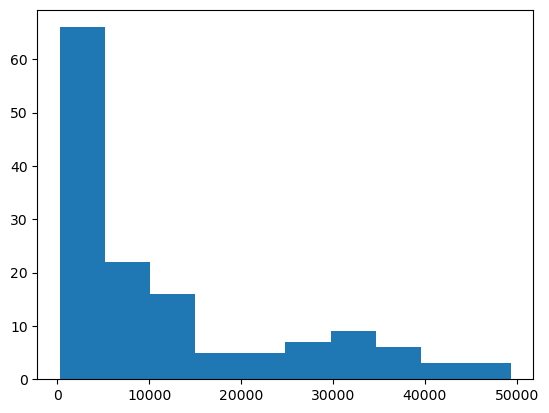

In [10]:
plt.hist(gm_latest['gdpPercap']);

**Protip**: Use a semicolon (`;`) at the end of the last line in a Jupyter notebook cell to suppress the notebooks from printing the return value of the last line. This was done in the above cell. Try removing the `;` to see how the output changes.

This histogram tells us that many of the countries had a low GDP, which was less than 5,000. There is also a second "bump" in the histogram around 30,000. This type of distribution is known as **bi-modal**, since there are two modes, or common values.

To make this histogram more interpretable let's add a title and labels for the $x$ and $y$ axes. We'll pass strings to `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to do so.

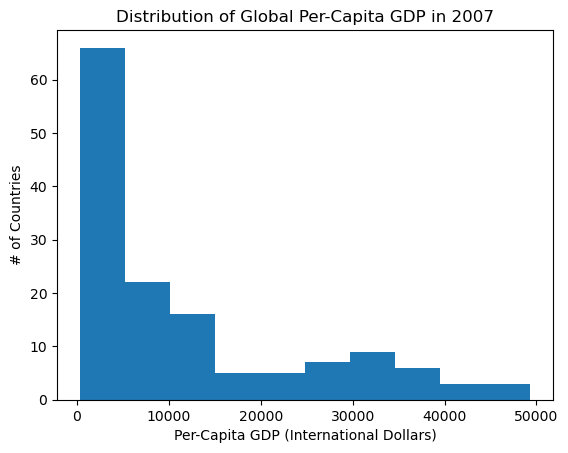

In [11]:
plt.hist(gm_latest['gdpPercap'])
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

Each line in the histogram represents a bin. The height of the line represents the number of items (countries in this case) within the range of values spanned by the bin. In the last plots we used the default number of bins (10), now let's use more bins by specifying the `bin=30` parameter.

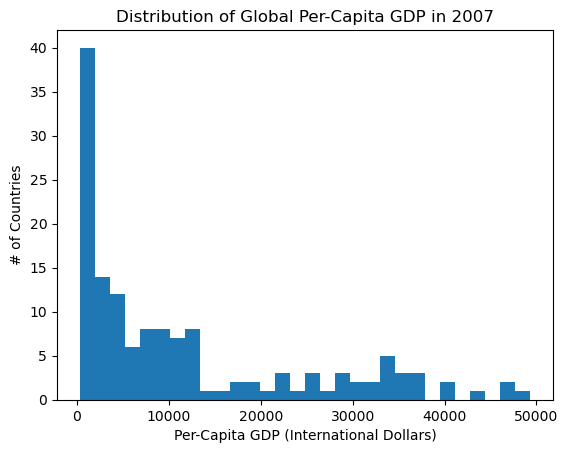

In [12]:
plt.hist(gm_latest['gdpPercap'], bins=30)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

We can see this histogram doesn't look as "smooth" as the last one. There's no "right" way to display a histogram, but some bin counts definitely are more informative than others. For example, using only 3 bins we cannot see the bi-modal nature of the GDP distribution.

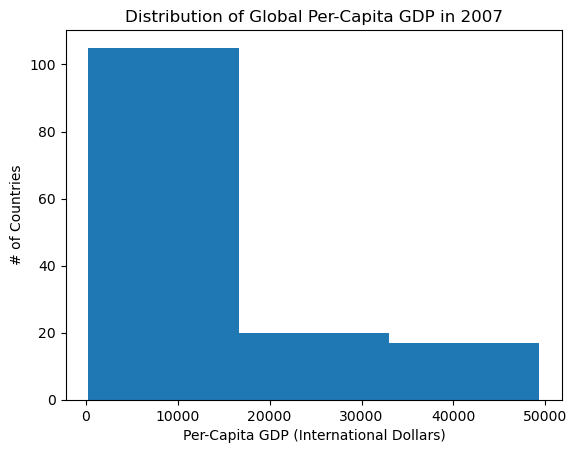

In [13]:
plt.hist(gm_latest['gdpPercap'], bins=3)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

#### Multiple calls to `plt`

As you can see, we can call functions in the `plt` module multiple times within a single cell and those functions will all work on, and modify, the current figure associated with the current cell. This is because `pyplot` (or `plt`) keeps an internal variable for the current figure which is unique to each cell `plt` is used in.

**NOTE:** Unless specified in the help function, the order of these function calls doesn't matter. See that the cell below produces the same plot as the one above even though the calls to `plt` functions are in a different order.

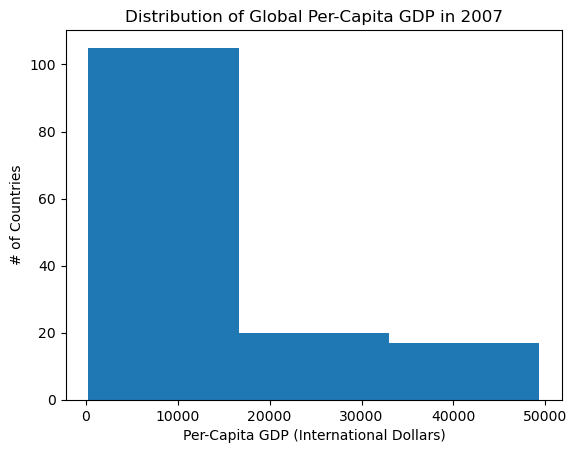

In [14]:
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.hist(gm_latest['gdpPercap'], bins=3)
plt.ylabel('# of Countries');

The styling that you see in the plot above are the `matplotlib` defaults. For now, we'll continue to use those defaults as the first portion of this workshop is geared toward getting you familiar with the API-how to actually create the plots you're interested in. Then, we'll cover how to customize plot styles in a later section.

#### Pandas methods to make plots

Also note that when you are working with Pandas DataFrames you will have access to DataFrame methods to produce a lot of the same types of plots!

These methods' plots are still produced by Matplotlib 'under the hood'. The methods often require less code than the Matplotlib approach, but they typically also provide less extensive customization. So they impose a **trade-off between convenience and customizability**.

In order to present you with a range of plotting options, we will present you with Pandas-equivalent code for a number of the plots we demonstrate below. 

Here is the first, using the `DataFrame.hist` method:

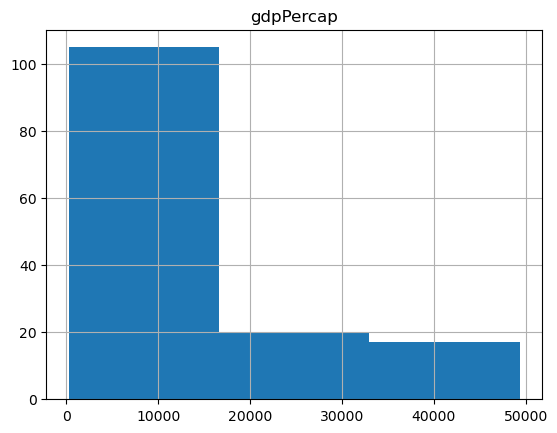

In [15]:
gm_latest.hist(column='gdpPercap', bins=3);

According to the docs, we can also get rid of that grid, if we'd like, by feeding in the `grid=False` argument
(because it defaults to `True`).

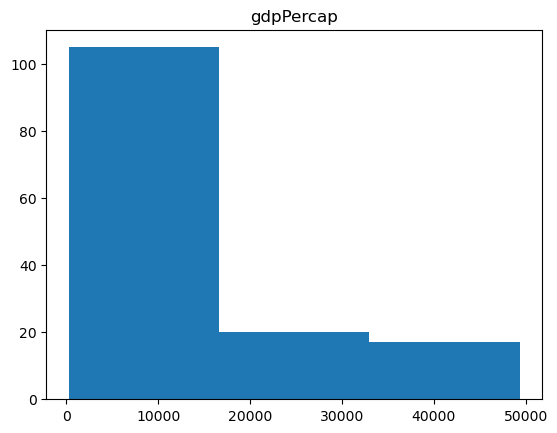

In [16]:
gm_latest.hist(column='gdpPercap', bins=3, grid=False);

And we can also combine that call with some Matplotlib code, to get back our custom title and axis labels,
giving us an identical plot to the one we produced above with *only* Matplotlib code.

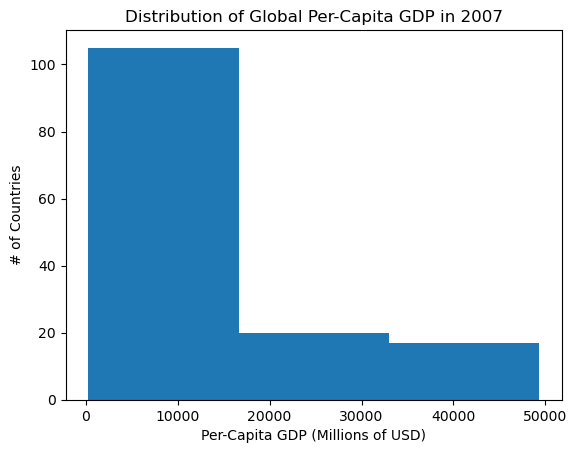

In [17]:
gm_latest.hist(column='gdpPercap', bins=3, grid=False)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

#### Challenge Questions

1. Create a histogram of life expectancy in the year 2007 across all 142 countries in the gapminder dataset. Play with the `bins=` parameter to find the most informative bin number.

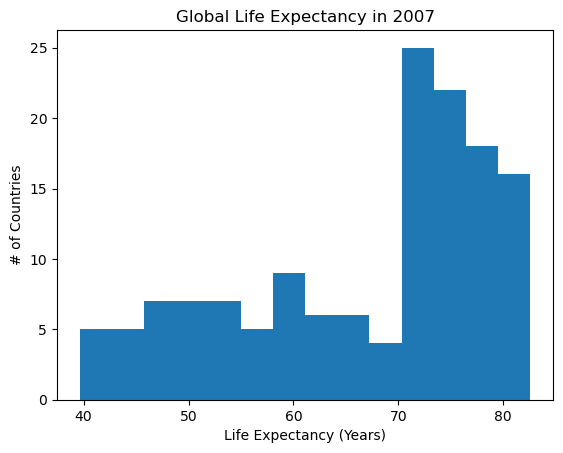

In [19]:
# Try 14 bins
plt.hist(gm_latest['lifeExp'], bins=14)
plt.title('Global Life Expectancy in 2007')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('# of Countries');

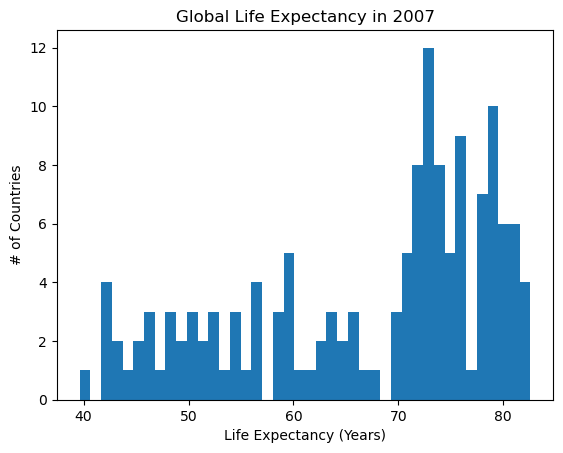

In [20]:
# Try 42 bins
plt.hist(gm_latest['lifeExp'], bins=42)
plt.title('Global Life Expectancy in 2007')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('# of Countries');

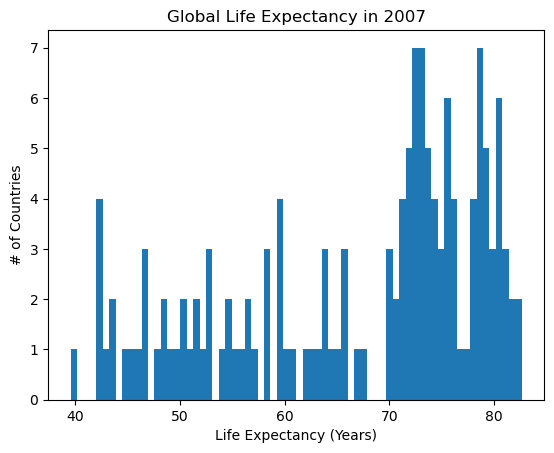

In [21]:
# Try 70 bins
plt.hist(gm_latest['lifeExp'], bins=70)
plt.title('Global Life Expectancy in 2007')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('# of Countries');

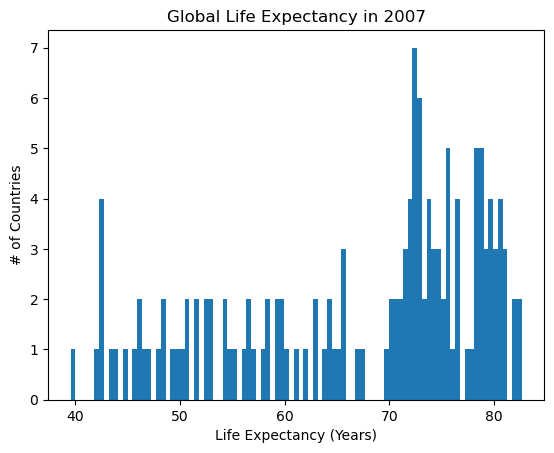

In [22]:
# Try 95 bins
plt.hist(gm_latest['lifeExp'], bins=95)
plt.title('Global Life Expectancy in 2007')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('# of Countries');

2. What can you say about the distribution of life expectancy values in 2007?

*Right-skewed bell curve: many counties have life expectancy > 70 years though the curve's left tail shows a fair number of countries with life spans of 40 to 65 years.

### Bar Plots

Next, it might be interesting to get a sense of how many countries per continent we have data for. Let's create a country `DataFrame` that includes only the unique combinations of country and continent by dropping all duplicate rows using `drop_duplicates()`

In [23]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()

In [24]:
countries.shape

(142, 2)

To get the number of countries per continent we'll use the `.groupby()` method to group by `continent`, then count the unique countries in each continent. We'll use the `as_index=False` argument so that the continent name gets its own column, and is not used as the index. This will create a new `DataFrame` that we'll call `country_counts`.

In [25]:
country_counts = countries.groupby('continent', as_index=False).agg('count')
country_counts

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


Let's rename the `country` column to be `n_countries` for number of countries.

In [26]:
country_counts.columns = ['continent', 'n_countries']
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


Let's use a **bar plot** to plot this data, which we saw in the theory section is an effective way to compare the magnitudes of a number of data points on the same scale. Bar plots look a lot like histograms, but differ in that they do not represent a distribution of data, rather a collection of data points. 

Making a bar plot in `matplotlib` is done conveniently using `plt.bar`. This takes two arguments, the first is the location on the $x$-axis that the bars should appear, and the second is the height of each bar on the $y$-axis, which in our case is equal to `n_countries`. Since we want the bars to appear equidistant from each other, we'll create a sequence of increasing numbers going from `0` to the number of bars we want plotted (# of continents, or `len(continents)` here) using the `range` function.  

Let's also use `plt.xticks()` and the continent names to label the $x$-ticks, which are the text below each bar on the $x$-axis. The `plt.xticks()` function takes two arguments. The first is the *position* for the label and the second is the label itself. The arguments are container-like objects, such as `list`s or `numpy` arrays. 

In [27]:
continents = country_counts['continent']
continents

0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object

In [28]:
n_continents = len(country_counts)
x = range(n_continents)
print(x)

range(0, 5)


In [29]:
y = country_counts['n_countries']
y

0    52
1    25
2    33
3    30
4     2
Name: n_countries, dtype: int64

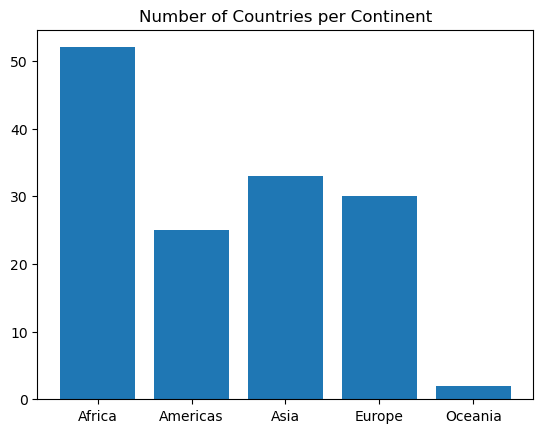

In [30]:
plt.bar(x, y)

plt.title('Number of Countries per Continent')
plt.xticks(x, continents);

#### Pandas equivalent

And here are three ways to use the `DataFrame.plot` Pandas method to get a nearly identical plot:

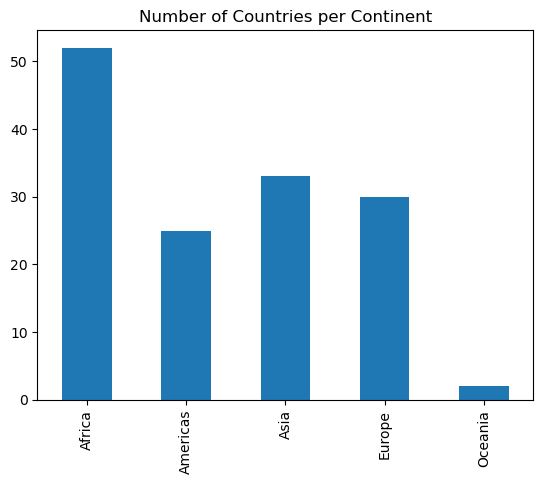

In [31]:
# Option 1
y.plot(kind='bar', title='Number of Countries per Continent')
plt.xticks(x, continents);

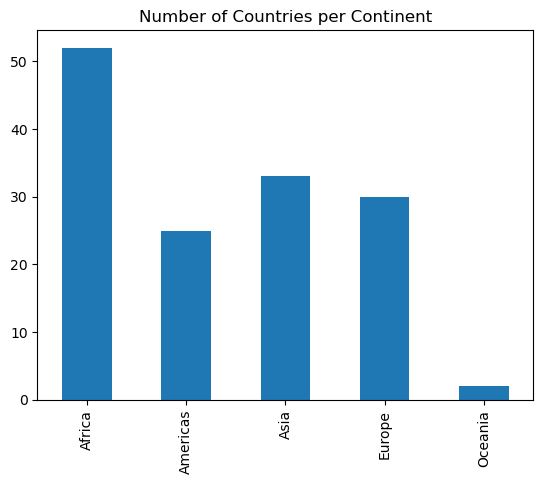

In [32]:
# Option 2
ax = y.plot(kind='bar',
            title='Number of Countries per Continent',
            xticks=x)
ax.set_xticklabels(continents);

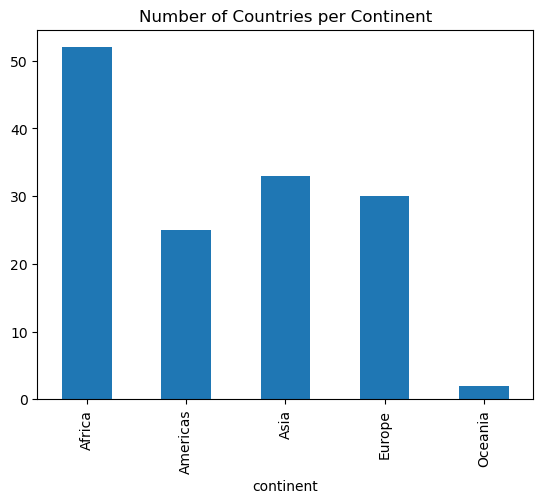

In [33]:
# Option 3
country_counts.plot(kind='bar',
                    x='continent',
                    y='n_countries', 
                    title='Number of Countries per Continent',
                    legend=False);

***What happened in that second option?***

The `DataFrame.plot` methods returns a Matplotlib Axes object
(a handle for the axes we plotted on), which we can save to some variable (`ax`), and then call additional
methods on to tweak the axes' characteristics!

In fact, we would actually see that if we called `DataFrame.plot` without assigning its output to a variable, or silencing its output with the semicolon:

<Axes: >

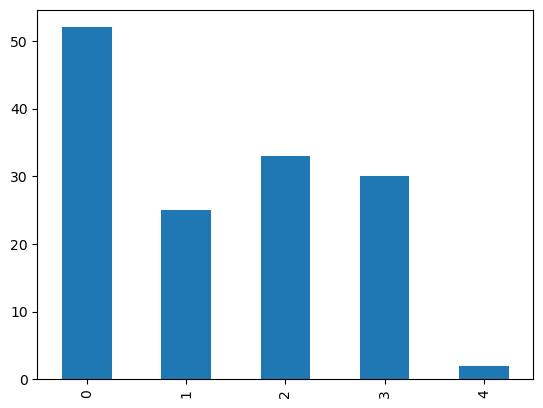

In [34]:
y.plot(kind='bar')

At this point you may be thinking, "why so many different approaches to the same thing?!". It might be dizzying. 

But there is no need to remember the many different ways to do one thing! Just notice how tightly integrated into Pandas Matplotlib is, so that in the future you can search and use whichever approach works for you.

#### Challenge Questions

In [35]:
# Get the countries in Oceania in 2007
gm_latest_oceania = gm_latest[gm_latest['continent'] == 'Oceania']
gm_latest_oceania

,country,continent,year,lifeExp,pop,gdpPercap
71,Australia,Oceania,2007,81.235,20434176.0,34435.36744
1103,New Zealand,Oceania,2007,80.204,4115771.0,25185.00911


3. Create a bar plot showing the per-capita GDP for all the countries in Oceania during 2007.

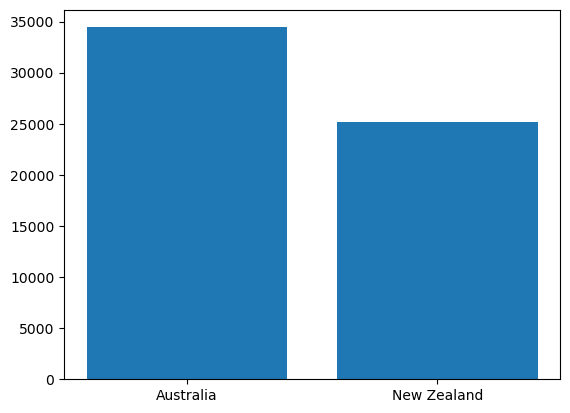

In [36]:
plt.bar(range(len(gm_latest_oceania)), gm_latest_oceania['gdpPercap'])
plt.xticks(range(len(gm_latest_oceania)), gm_latest_oceania['country']);

4. **\[OPTIONAL\]**. The above bar plot shows the counts of countries in each continent. We might be interested in the proportion of countries that exist in each of the 5 continents. Do a web search for `plt.pie` and figure out how to make a pie plot that displays proportions of all countries contained in each of the 5 continents.

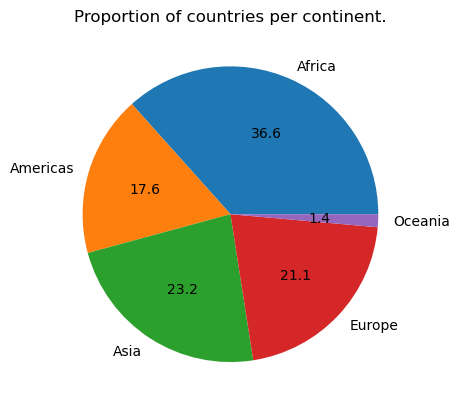

In [37]:
plt.pie(country_counts['n_countries'], labels=continents, autopct='%.01f')
plt.title('Proportion of countries per continent.');

### Boxplots

Now that we know we've seen how GDP was distributed during 2007, and how many countries are in each continent, we might want to know how GDP is distributed within each continent. While we could plot 5 histograms, we can also take advantage of a useful type of plot for just this purpose, a **boxplot**.

`plt.boxplot` creates just that, and can take a list of arrays, with each array representing a distribution to plot. Since the number of countries in each continent is different, we will create an array for each continent that contains the GDP values of all countries in each continent.

In [38]:
continent_gdp_latest = []
for c in continents:
    gm_latest_cur_cont = gm_latest[gm_latest['continent'] == c]
    cur_gdp_vals = gm_latest_cur_cont['gdpPercap'].values
    continent_gdp_latest.append(cur_gdp_vals)

In [39]:
continent_gdp_latest

[array([ 6223.367465 ,  4797.231267 ,  1441.284873 , 12569.85177  ,
         1217.032994 ,   430.0706916,  2042.09524  ,   706.016537 ,
         1704.063724 ,   986.1478792,   277.5518587,  3632.557798 ,
         1544.750112 ,  2082.481567 ,  5581.180998 , 12154.08975  ,
          641.3695236,   690.8055759, 13206.48452  ,   752.7497265,
         1327.60891  ,   942.6542111,   579.231743 ,  1463.249282 ,
         1569.331442 ,   414.5073415, 12057.49928  ,  1044.770126 ,
          759.3499101,  1042.581557 ,  1803.151496 , 10956.99112  ,
         3820.17523  ,   823.6856205,  4811.060429 ,   619.6768924,
         2013.977305 ,  7670.122558 ,   863.0884639,  1598.435089 ,
         1712.472136 ,   862.5407561,   926.1410683,  9269.657808 ,
         2602.394995 ,  4513.480643 ,  1107.482182 ,   882.9699438,
         7092.923025 ,  1056.380121 ,  1271.211593 ,   469.7092981]),
 array([12779.37964 ,  3822.137084,  9065.800825, 36319.23501 ,
        13171.63885 ,  7006.580419,  9645.06142 , 

In a boxplot a box is created for each array where the top and bottom lines of the box indicate the third and first quartiles, respectively. An orange bar in the middle indicates the median. "Whiskers" show the extent of the extreme values (in this case 1.5 times the interquartile range, which is the third minus the first quartile). "Fliers" or "outliers" are shown in black circles and are drawn for all values that are outside of the whiskers, or interquartile value here.

Now we'll use this list of arrays to make a boxplot. We'll also update the xticks, title, axes labels.

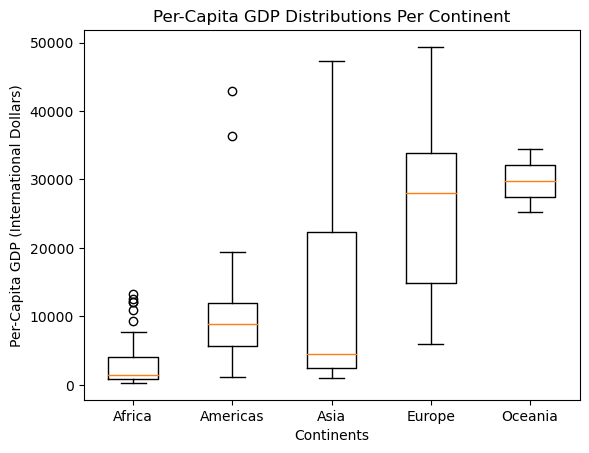

In [40]:
plt.boxplot(continent_gdp_latest)
plt.title('Per-Capita GDP Distributions Per Continent')
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)')
plt.xticks(range(1, len(continents) + 1), continents);

That's a useful figure, but there's a lot going on in such a small plot. Let's use `plt.figure(figsize=)`. to make the plot bigger. `figsize` takes a tuple of width and height, in inches. (Note that figure sizes change with changes to DPI.)

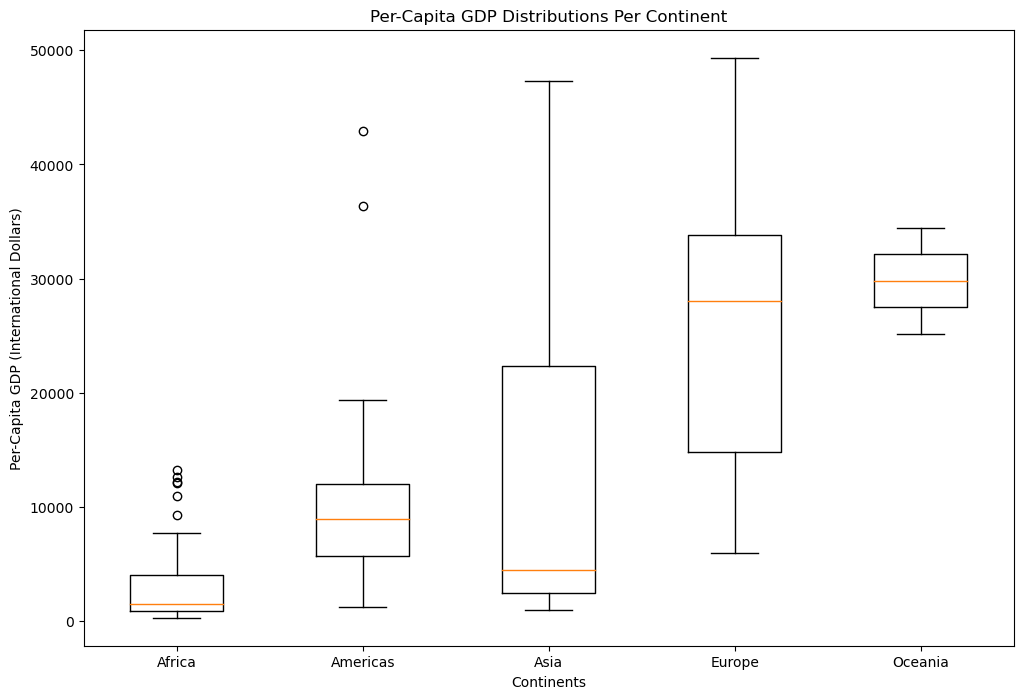

In [41]:
plt.figure(figsize=(12, 8))
plt.boxplot(continent_gdp_latest)
plt.title('Per-Capita GDP Distributions Per Continent')
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)')
plt.xticks(range(1, len(continents) + 1), continents);

That's better!

#### Pandas equvialent

Pandas also has a `DataFrame.boxplot` method!

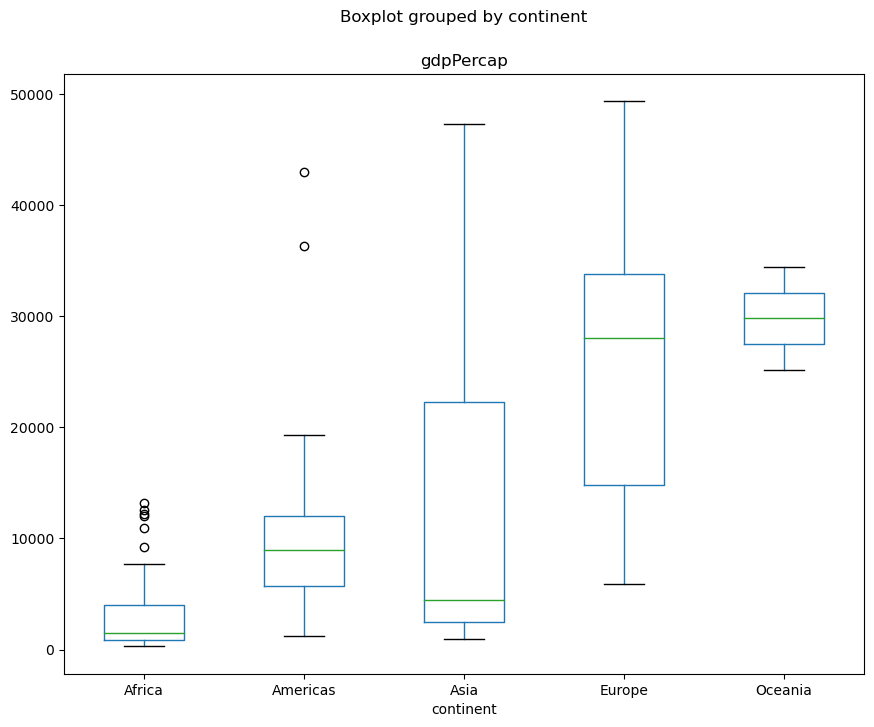

In [42]:
gm_latest.boxplot(column='gdpPercap', by='continent', grid=False, figsize=(10, 8));

#### Challenge Questions

5. Knowing how to interpret your plots is almost as important as knowing how to make them! Looking at the above box plot of per-capita GDP for each continent, what information do you take away from it? Where do you think the U.S.A is represented in this plot? And how could you confirm that?

*U.S.A. is above the Americas' error bar; it's the highest circle, well above the box plot, in the Americas, with a GDP of over 40,000.*

In [44]:
gm_latest[gm_latest['country'] == 'United States']

,country,continent,year,lifeExp,pop,gdpPercap
1619,United States,Americas,2007,78.242,301139947.0,42951.65309


### Line Plots

Now let's say that we're interested in visualizing a single country's per-capita GDP, and seeing how it has changed over time. Let's look at Portugal's GDP per capita over time. To make things easier, we'll create a second `DataFrame` containing just data from Portugal.

In [45]:
portugal = gm[gm['country'] == 'Portugal']

In [46]:
portugal.head()

,country,continent,year,lifeExp,pop,gdpPercap
1236,Portugal,Europe,1952,59.82,8526050.0,3068.319867
1237,Portugal,Europe,1957,61.51,8817650.0,3774.571743
1238,Portugal,Europe,1962,64.39,9019800.0,4727.954889
1239,Portugal,Europe,1967,66.60,9103000.0,6361.517993
1240,Portugal,Europe,1972,69.26,8970450.0,9022.247417


While there are theoretically many ways we could plot these data, let's use what we learned about human perception from Cleveland and McGill to guide our choice of plots. We saw that "position along a common scale" was the most accurate perceptual task, and a **Line Plot** uses exactly that. In fact, line plots are one of the most commonly used plots for visualizing **time-series data** (data that changes as a function of time) because the data points are connected (unlike bar plots) allowing for easy perception of the trend across time. 

To make the line plot, we simply call the `plt.plot()` function. The first argument should contain a list-like sequence of $x$-axis values, and the second argument should contain a list-like sequence of the $y$-axis values. We'll use the year as the $x$-axis and per-capita GDP as the $y$-axis.

**Note** that $x$ and $y$ must have the same dimensions-that is, be of the same length.

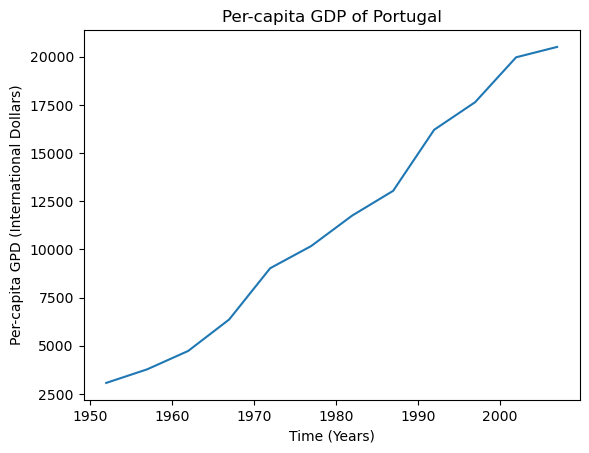

In [47]:
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)');

This plot clearly shows that Portugal's per-capita GDP has been increasing over time. Cool!

What if we want to compare how Portugal's GDP changed relative to its neighbor's Spain? To do that we can get a second `DataFrame` for Spain and plot them together on the same plot. We'll also make the plot wide and short to better see time.

In [48]:
spain = gm[gm['country'] == 'Spain']

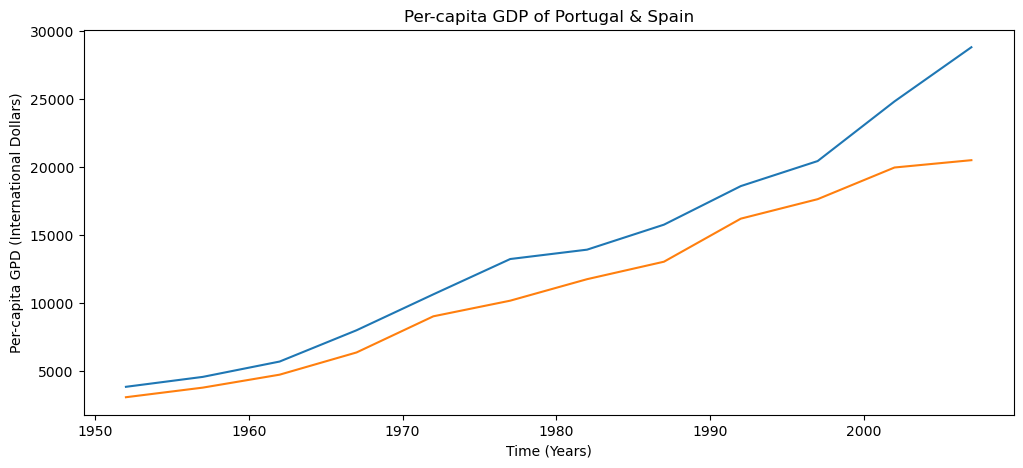

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(spain['year'], spain['gdpPercap'])
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)');

Ok, that's cool, but which line represents which country? To determine that we need a legend. `matplotlib` makes it easy to create a legend. First, we need to add the `label=<country_name>` parameter to the `plt.plot()` functions, then call `plt.legend()`. Let's see it:

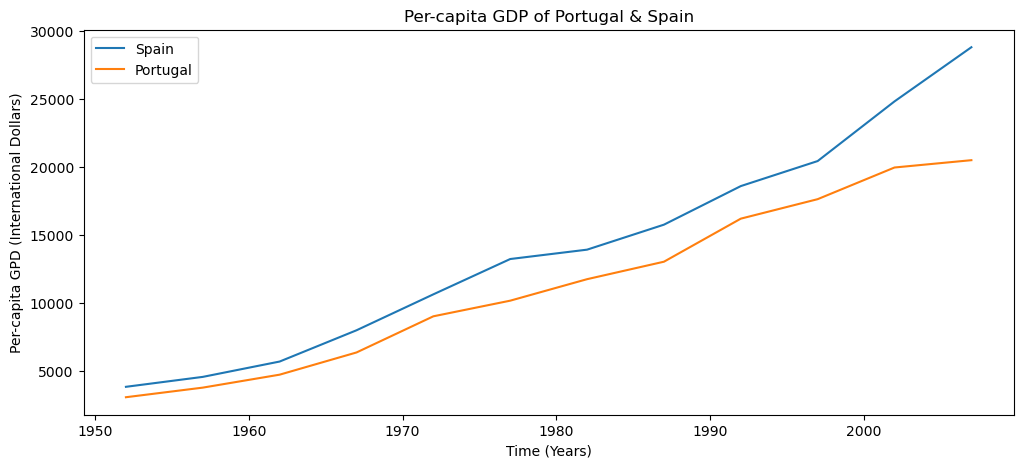

In [50]:
plt.figure(figsize=(12,5))
plt.plot(spain['year'], spain['gdpPercap'], label='Spain')
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal')
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

Much better! Now we can see that Spain's GDP has been consistently greater than Portugal's from 1950 until 2007.

#### Pandas equivalent

Remember `DataFrame.plot`'s "kind" argument? Well it turns out that we can use that argument to create a variety of plot types!

In [51]:
help(gm.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

Here's its line plot:

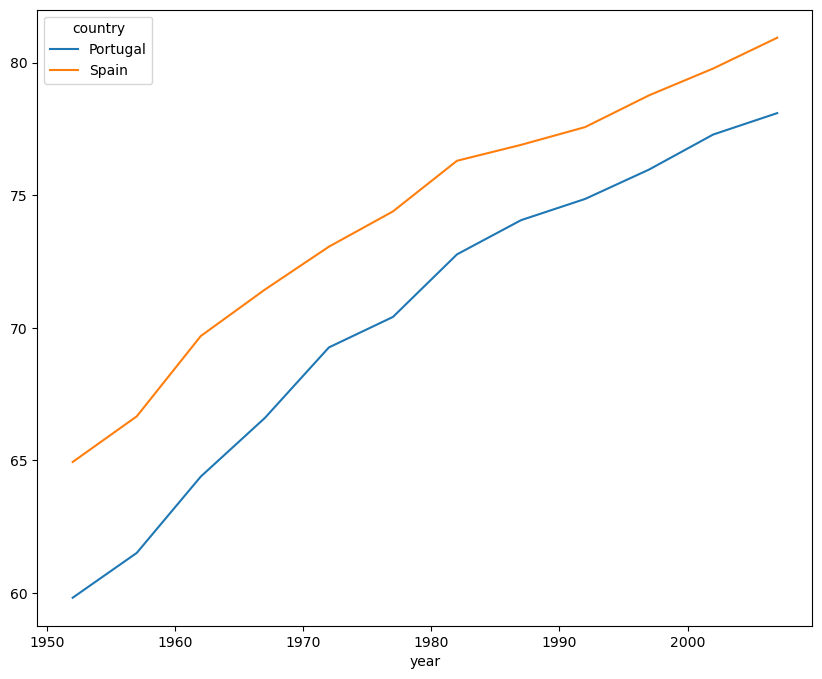

In [52]:
gm[gm.country.isin(['Spain', 'Portugal'])].pivot(index='year', 
                                                 values='lifeExp', 
                                                 columns='country').plot(figsize=(10, 8));

#### Challenge Questions

6. Create another line plot showing the life expectancy for Spain and Portugal across all the years in the dataset similar to the one above, but try to add some customizations (e.g., changing the font sizes, different line colors, etc.). You can use the `help()` function to see what kind of customizations are available.

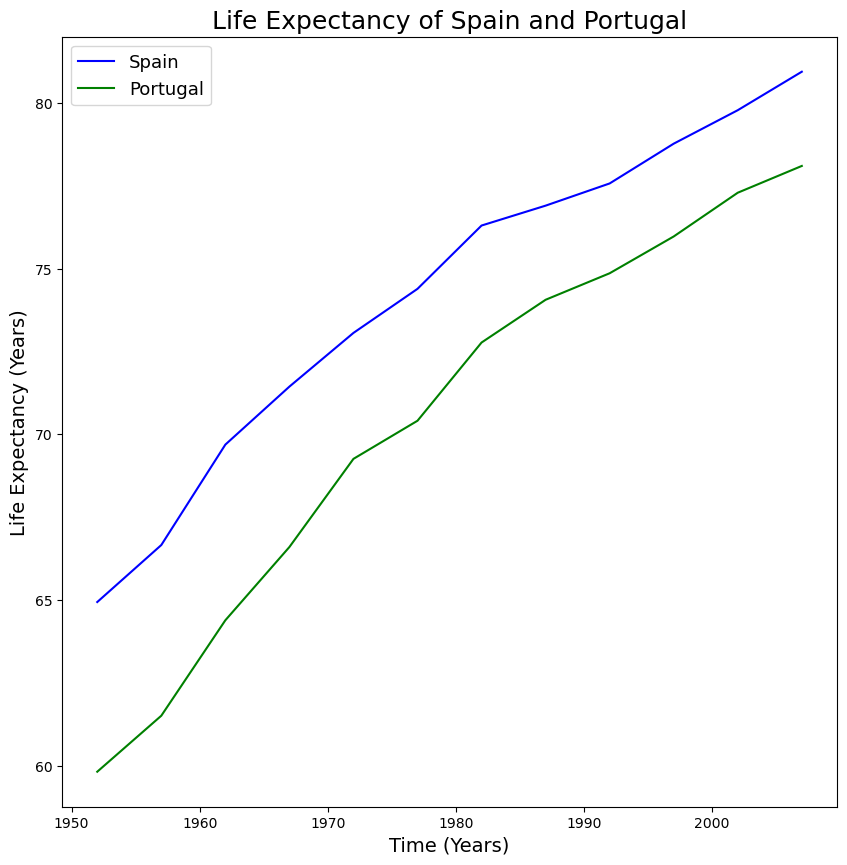

In [53]:
plt.figure(figsize=(10, 10))
plt.plot(spain['year'], spain['lifeExp'], label='Spain', color='blue')
plt.plot(portugal['year'], portugal['lifeExp'], label='Portugal', color='green')
plt.title('Life Expectancy of Spain and Portugal', fontsize=18)
plt.xlabel('Time (Years)', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)
plt.legend(prop={'size': 13});

7. Does Spain or Portugal have a higher life expectancy across all the years? How does this relate to per-capita GDP? How might we look for a relationship?

*Spain consistently has a higher life expectancy than Portugal. Look for a relationship between per capita GDP and life expectancy by graphing a line plot of the relationship between life expectancy and GDP.*

### Scatter Plots

Next, let's imagine that we're interested in looking for a relationship between two variables, where both variables can take the same value multiple times, unlike time-series data where the time variable is constantly increasing. **Scatter plots** are a powerful way to visualize the joint distribution of your data points across two variables. 

To illustrate this we'll use `plt.scatter` to visualize the relationship between per capita GDP (`gdpPercap` on the $x$-axis) and life expectancy (`lifeExp`on the $y$-axis) across all countries and all years. Specifying the `marker='.'` argument tells the plot to use small circles to indicate each data point. There are many other marker styles, see [here](https://matplotlib.org/stable/api/markers_api.html) for more.

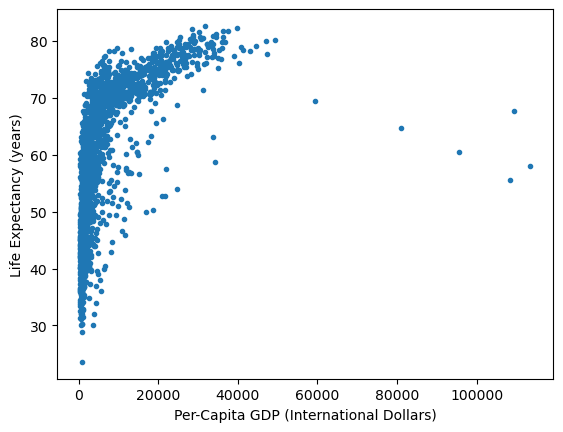

In [54]:
plt.scatter(gm['gdpPercap'], gm['lifeExp'], marker='.')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

#### Pandas equivalent

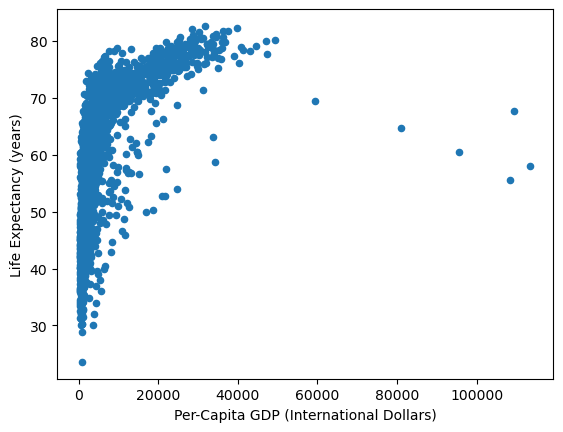

In [55]:
gm.plot(x='gdpPercap', y='lifeExp', kind='scatter')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

Like with `plt.plot()`, the first argument in `plt.scatter()` corresponds to the $x$-axis and the second to the $y$-axis.

#### Transformations

The above scatter plot has some really large GDP values out to the right of the plot. When dealing with data that have large outliers like this, plotting a transformation of the data can make it more interpretable. A standard transformation is to apply the `log` function, so let's try that here.

**NOTE** Let's not forget to change the x-axis label to indicate the new units being displayed! 

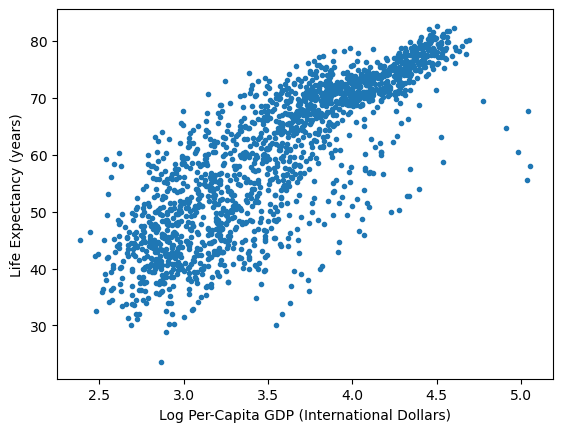

In [56]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.')
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

That looks much better. We can now see there is somewhat of a linear relationship between the log of GDP and life expectancy. Interesting!

#### Transparency

This plot looks good, but could be better, especially since there are so many points and they overlap. To fix that we can change the transparency, or opacity, of the face and edges of the markers using the `alpha` parameter. This is a value from `0`-`1`, where `0` is completely transparent (e.g. it's not displayed) to `1` being completely opaque (which is the default seen in the previous plot).

And while we're at it we'll change the fill color with the `facecolor` parameter, and the border color of each marker with the `edgecolor` parameter using one of:

* single letters representing built-in colors (e.g., `b` for blue)
* html hex strings
* html color names
* RGB tuples (with each element between 0 and 1)
* string encoded floating point values between 0 and 1 (for gray shades)

For *no* color, use `'None'`. For more information on colors in `Matplotlib` see [the documentation](https://matplotlib.org/stable/api/colors_api.html).

A great place to find information on color palettes is [ColorBrewer](http://colorbrewer2.org/). Matt Davis has created a great Python package called [Palettable](https://jiffyclub.github.io/palettable/) that gives you access to the ColorBrewer, Cubehelix, Tableau, and Wes Anderson palettes.

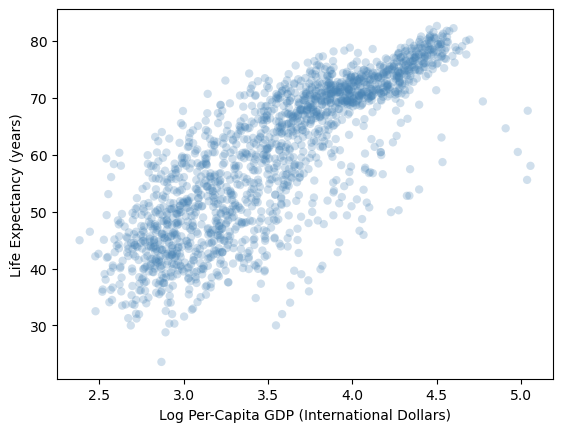

In [57]:
plt.scatter(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=0.25,
            facecolor='SteelBlue',
            edgecolor='None')
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

Now that we've seen that there exists a relationship between GDP and life expectancy at the global scale and across the last 50 years, let's see if we can use similar scatter plots to break that relationship down as a function of both time (year) and location (continent). 

To do that we'll introduce two new techniques, the use of color and `subplots`.

#### Color

Although color was the worst of the 6 perceptual tasks found by Cleveland and McGill it can still be a useful way to add even more information to the figure. 

Within a scatter plot, each data point may be assigned a different color depending on it's value in a third variable. To do so, we provide two additional keyword arguments to the `plt.scatter` method. 

The first is `c=<third_color_variable>`, where `<third_color_variable>` is a list-like sequence of values that is the same length as the data being plotted. The numbers will be normalized from 0-1, so any numbers will do. The second is `cmap=<colormap_name>`, where `<colormap_name>` is the name of `matplotlib` colormap, see [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for possibilities.

We'll make the same exact scatter plot as we just did, but add color to represent the year the data comes from. We'll use the `hot` colormap which goes from black->red->orange->yellow->white.

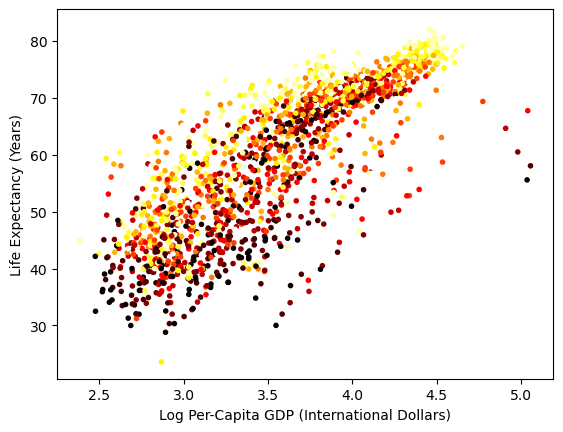

In [58]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (Years)');

While we can see there is some sort of trend dependent on color, we don't know what the color values mean. 

We can use `plt.colorbar()` to add a colorbar which will let us interpret the colors. By adding `.set_label()` to it we can set a textual label describing what the values in the colorbar represent.

We'll also increase the figure size, and the font size used in the title, xlabel and ylabel using the `fontsize=16` parameter. We'll also use a form of LaTeX called MathJax to write a subscript 10 underneath the word Log, like this: $\log_{10}$.

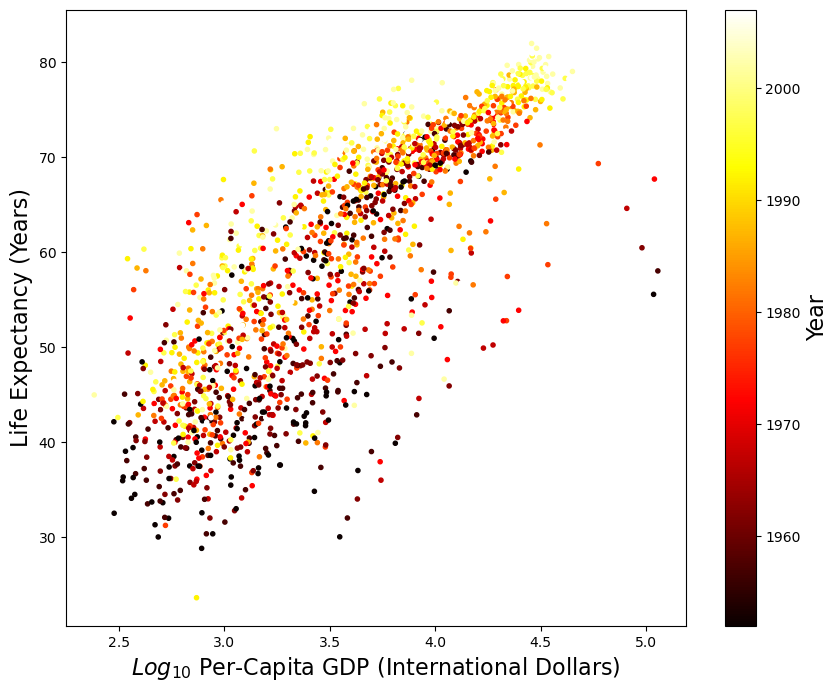

In [59]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('$Log_{10}$ Per-Capita GDP (International Dollars)', fontsize=16)
plt.ylabel('Life Expectancy (Years)', fontsize=16)
plt.colorbar().set_label('Year', fontsize=16);

Ok, now we can see that as time has increased from black in 1950 to yellow in 2000 average life expectancy has also increased. Nice! 


Now let's use `subplots` to break this down even further and see if this trend holds across all continents.

#### `plt.subplot`

Subplots allow you to draw multiple plots within a single figure. To do so, you use `plt.subplot(<num_rows>, <num_cols>, <index>)` where the number of rows and columns you want in the figure are specified as the first two parameters, respectively. The `<index>` tells subplot which subplot subsequent calls to `plt` will draw in. It starts at `1` for the top left subplot, and increases across rows, and then down columns. 

**NOTE** `plt.subplot()` uses a 1-based index (not 0-based like Python) to emulate the behavior of the Matlab version of this function. This can cause confusion!!

Let's look at a simple example plotting Spain and Portugal's GDP on separate plots next to each other in the same row.

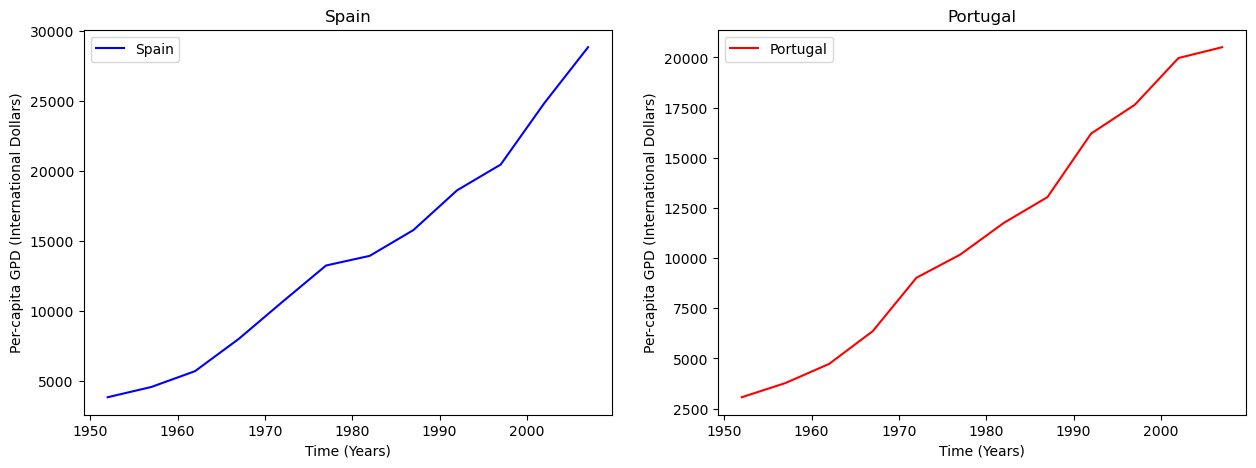

In [60]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

That looks pretty good, but if a careful observer would notice that these two plots are not on the same y-axis scales, and so cannot be easily compared at a glance. That is because matplotlib will automatically determine the min and max values for the y-axis based on the data itself. This results in a plot that is using as much of the "screen real-estate" as possible, and is usually what you want, but not always.

To set the y-axis values explicitly, we'll use the `vmin` and `vmax` option parameters. Let's see it:

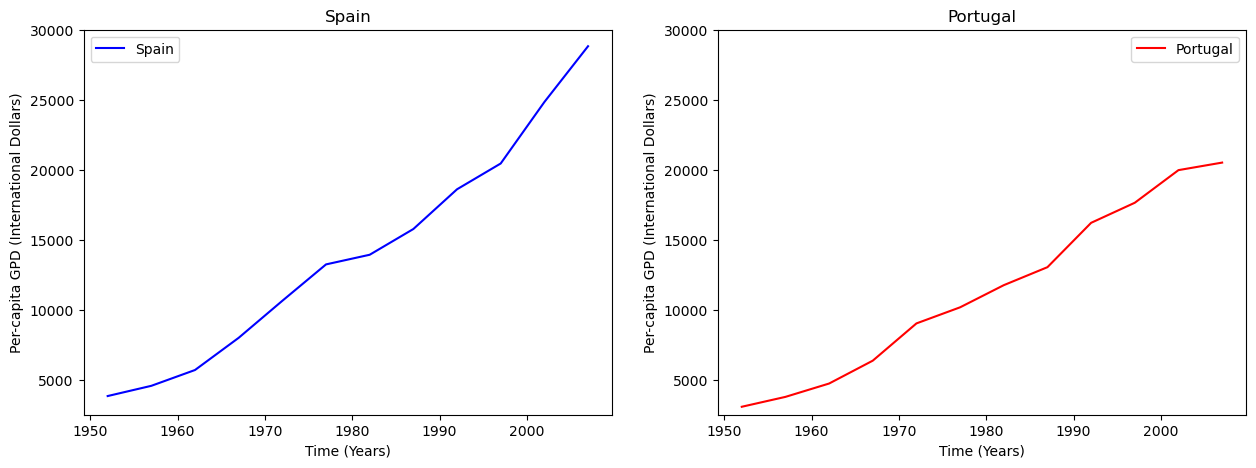

In [61]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.ylim(2500, 30000)
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.ylim(2500, 30000)
plt.legend();

Now we can see that Spain's per-capita GDP is actually much higher than Portugal's, which we couldn't easily tell before.

Now let's use subplots to make scatter plots for each continent separately. Since we have data on 5 continents, we'll make a figure with 6 subplots, 3 rows and 2 columns.

To do so we'll iterate (loop) over each continent and get a `DataFrame` that contains only the rows for countries in that continent. Then we'll set the subplot and create a scatter plot using that new `DataFrame`. Here's how it looks:

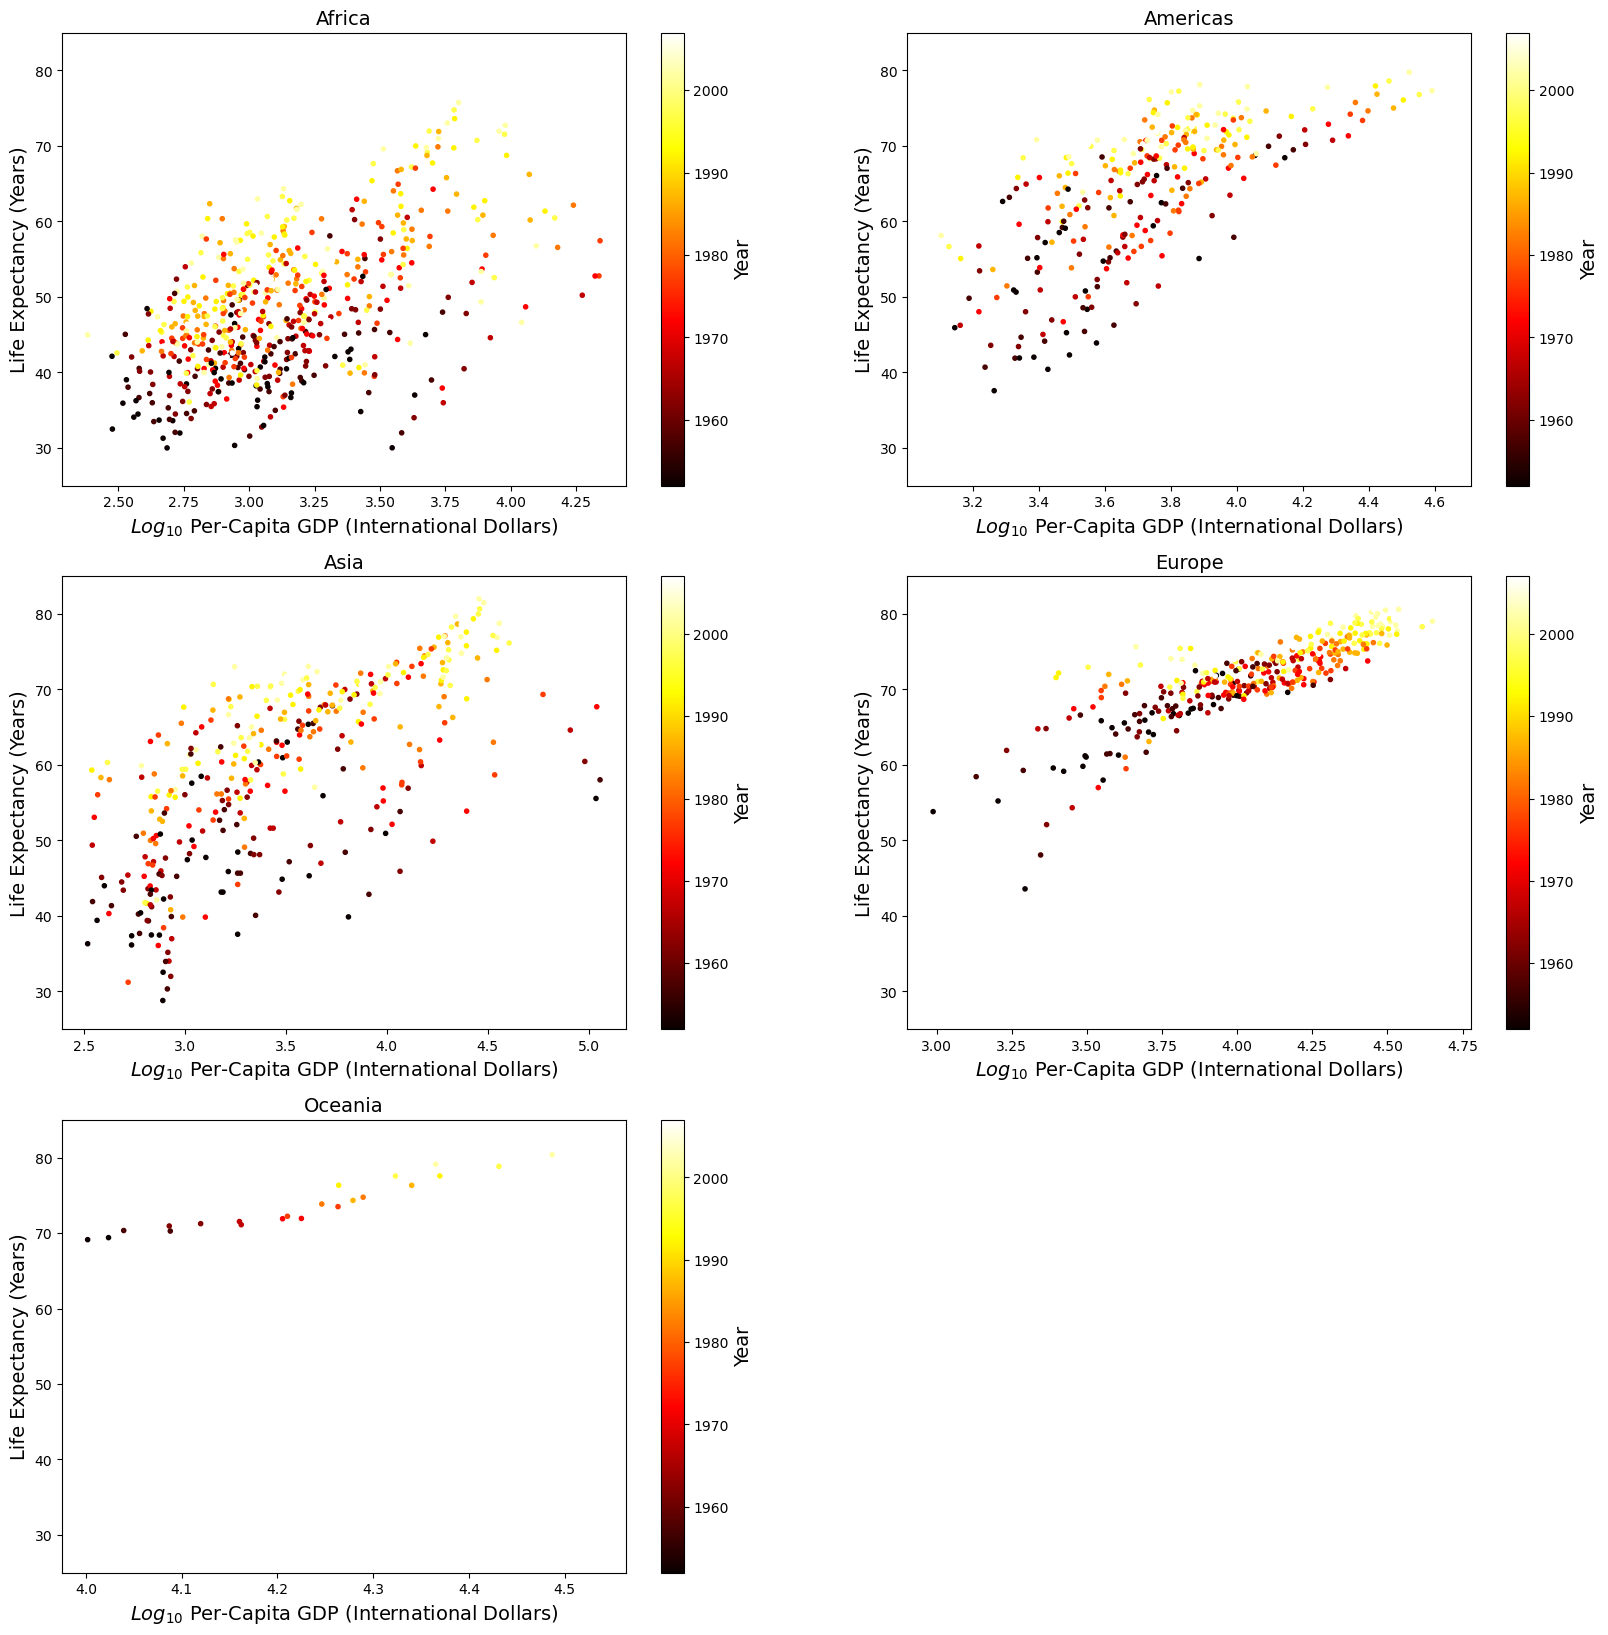

In [62]:
# NOTE: This MUST come first, one of the few things in plt where order matters
plt.figure(figsize=(20, 20))

for i,continent in enumerate(continents):
    # Get a dataframe with just countries in the current continent
    cur_continent_df = gm[gm['continent'] == continent]

    # Set the current subplot
    plt.subplot(3, 2, i+1)
    
    # make the current scatter plot 
    plt.scatter(np.log10(cur_continent_df['gdpPercap']), 
                cur_continent_df['lifeExp'], 
                marker='.', 
                c=cur_continent_df['year'], 
                cmap='hot')
    plt.xlabel('$Log_{10}$ Per-Capita GDP (International Dollars)', fontsize=14)
    plt.ylabel('Life Expectancy (Years)', fontsize=14)
    plt.title(continent, fontsize=14)
    plt.ylim(25, 85)
    plt.colorbar().set_label('Year', fontsize=14);

#### Challenge Questions

8. We've seen that life expectancy and per-capita GDP have a positive relationship. What about the relationship between population and per-capita GDP, is there one? Create a scatter plot that compares the two across all countries in 2007. 

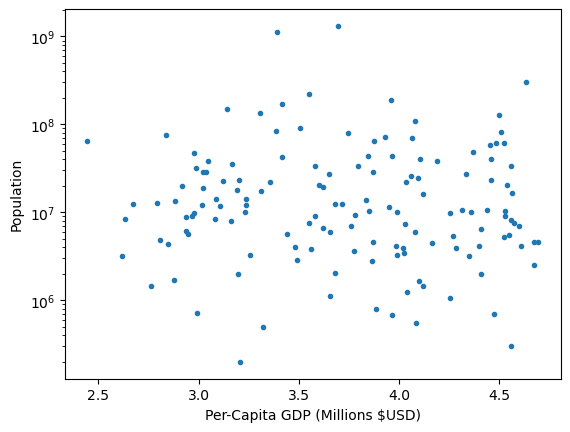

In [63]:
plt.scatter(np.log10(gm_latest['gdpPercap']), gm_latest['pop'], marker='.')
plt.xlabel('Per-Capita GDP (Millions $USD)')
plt.yscale('log')
plt.ylabel('Population');

9. Is that relationship between population and per-capita GDP different for the first year we have data in the dataset? Plot both first and latest years scatter next to each other in the same figure but different subplots. What can you say about any outliers you see?

(*HINT*: First you need to extract another `DataFrame` containing the data from the first year).

In [64]:
first_year = gm['year'].min()
print(first_year)
gm_first = gm[gm['year']== first_year]

1952


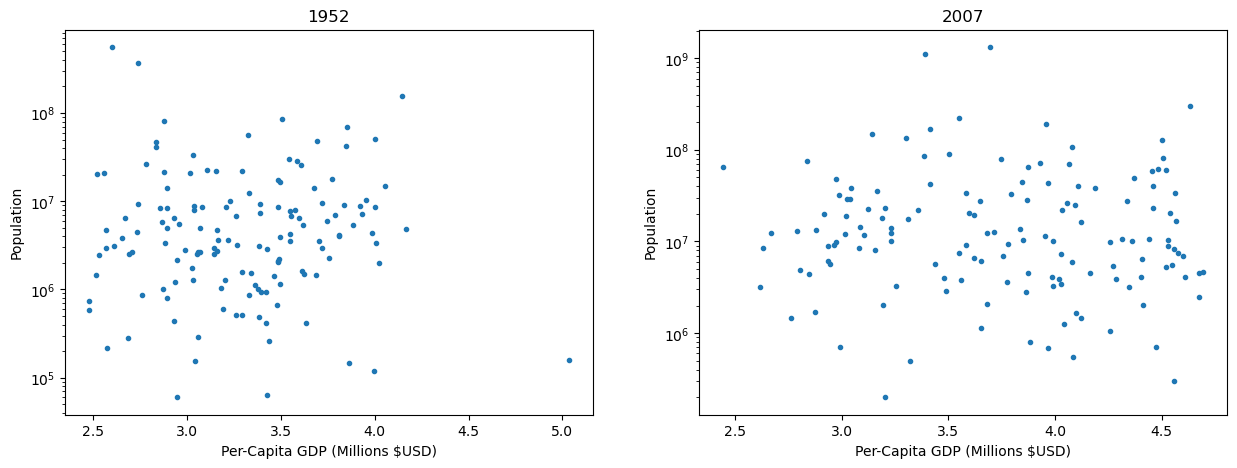

In [65]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(np.log10(gm_first['gdpPercap']), gm_first['pop'], marker='.')
plt.title('1952')
plt.xlabel('Per-Capita GDP (Millions $USD)')
plt.yscale('log')
plt.ylabel('Population');

plt.subplot(1,2,2)
plt.scatter(np.log10(gm_latest['gdpPercap']), gm_latest['pop'], marker='.')
plt.title('2007')
plt.xlabel('Per-Capita GDP (Millions $USD)')
plt.yscale('log')
plt.ylabel('Population');

#### Pandas approach

Here are a pair of plots related to (but not directly answering) the above questions, using Pandas methods again.

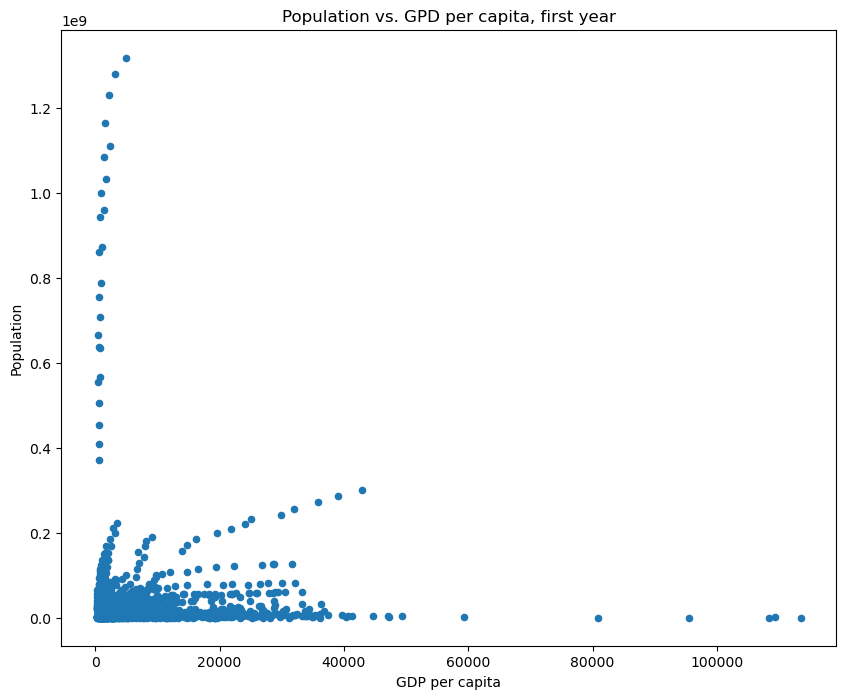

In [66]:
min_yr = gm.year.min()
gm_first_yr = gm[gm.year == min_yr]
gm.plot(x = 'gdpPercap', y='pop', kind='scatter', figsize=(10, 8))
plt.xlabel('GDP per capita')
plt.ylabel('Population')
plt.title('Population vs. GPD per capita, first year');

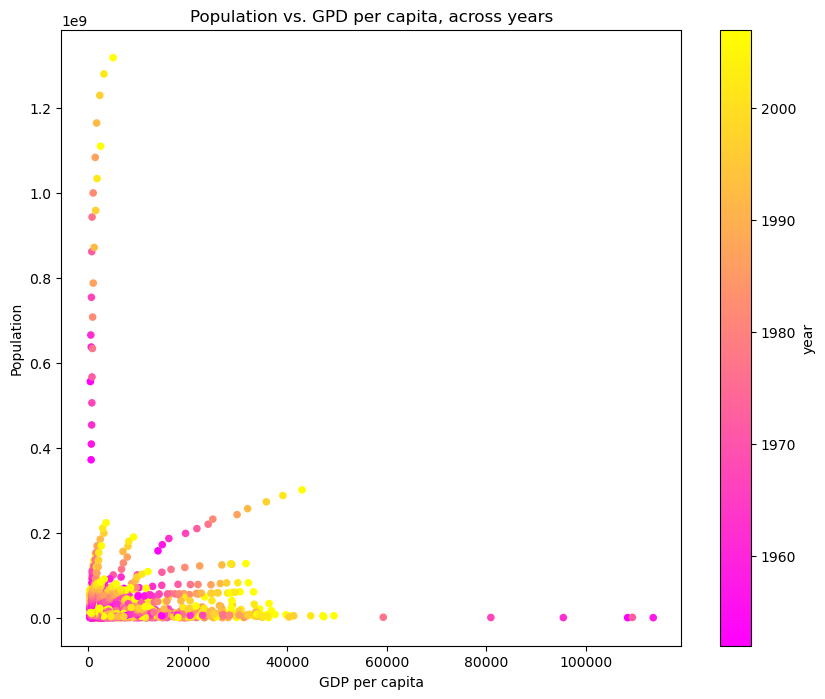

In [68]:
gm.plot(x = 'gdpPercap', y='pop', c='year', cmap='spring', kind='scatter', figsize=(10, 8))
plt.xlabel('GDP per capita')
plt.ylabel('Population')
plt.title('Population vs. GPD per capita, across years');

10. **\[OPTIONAL\]** Above we created a scatter plot between life expectancy and per-capita GDP colored by year. That coloring was done in a continuous way. What if we wanted to color it by decade instead, making a discrete coloring? Run the code cell below to create a new variable called `decades`. Then create another scatter plot of life expectancy vs per-capita GDP assigning the color strings in `hexsix` to data points from each of the six decades in the dataset. 

In [69]:
hexsix = np.array(['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837'])
gm['decade'] = (gm['year'] / 10).astype(int) * 10
decades = gm['decade'].unique()
decades

array([1950, 1960, 1970, 1980, 1990, 2000])

In [70]:
gm['decade'] = gm['year'].apply(lambda x: int(x / 10) * 10)

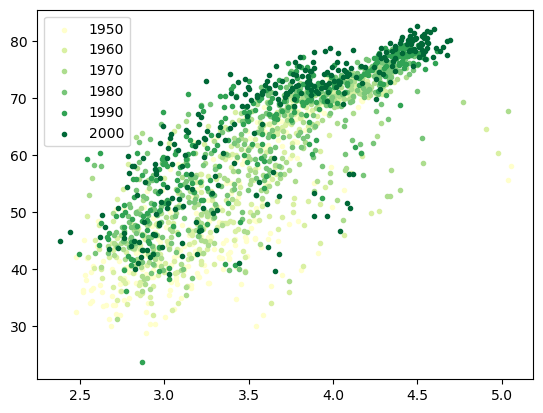

In [71]:
for i,cur_decade in enumerate(decades):
    cur_decade_gm = gm[gm['decade']==cur_decade]
    plt.scatter(np.log10(cur_decade_gm['gdpPercap']), 
                cur_decade_gm['lifeExp'], 
                marker='.', 
                color=hexsix[i], 
                label=str(cur_decade))
plt.legend();

## Plot Customization

The `matplotlib` defaults aren't the best. We've already changed several properties of the figures we've made, including the color and opacity of scatter plots, and font sizes for the title and axis label text. While this is useful, it can become tedious to include many customization parameters in every plot we make. We can, however, customize almost any property for all plots using the `matplotlibrc` configuration file. This file allows you to specify new default values for `matplotlib` properties, which are called "rc settings" or "rc parameters". These settings are then loaded every time you use `matplotlib`.

The `matplotlibrc` file is typically found in the `.../site-packages/matplotlib/mpl-data` directory. Here is an example of a full path: `/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data`. The full path on your computer will depend on where *your* Python is installed.


Before setting these new rc settings manually, let's create a plot using the default rc settings, so we can see how they change the look of the plot. 

We'll plot the average per-capita GDP across time for each continent separately. To do this we'll use `groupby` again, this time grouping by continent and year, and then taking the mean over GDP.

In [72]:
per_continent_mean_gdp = gm.groupby(['continent', 'year'], as_index=False)['gdpPercap'].mean()

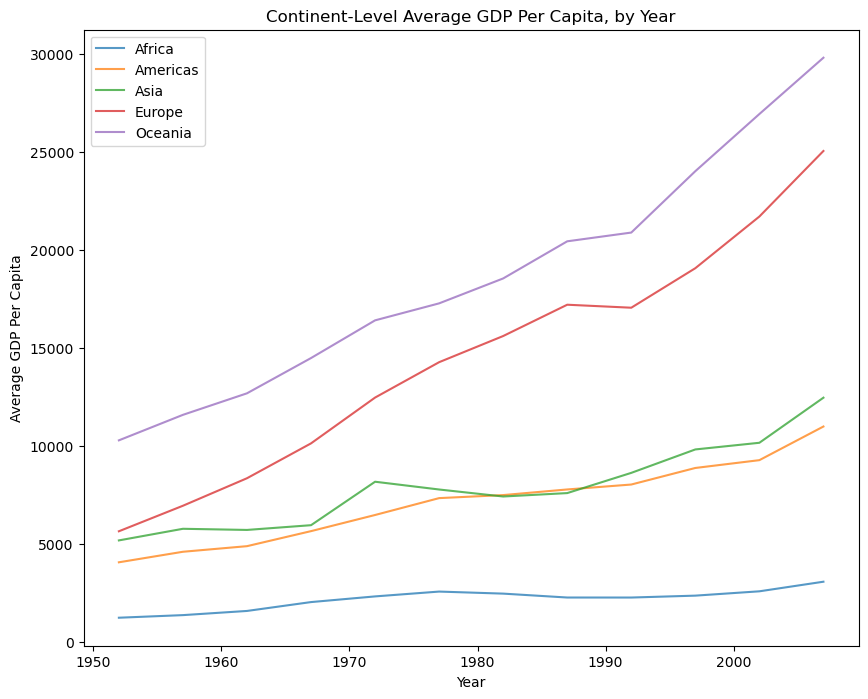

In [73]:
plt.figure(figsize=(10, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

Ok, that's a decent looking plot, but it can be better! Let's change the default rc settings. Instead of modifying the `matplotlibrc` file directly, we'll change some default rc settings directly using Python code. Changing the rc settings in code *does not* modify your `matplotlibrc` file, and it only changes the settings for the current Python session. 

Below is a dictionary containing some rc parameters whose values we're going to modify. The keys of the dictionary are the rc parameter names, and the values are the new defaults that we're setting. 

These parameter values come from Cameron Davidson-Pilon's [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/styles/matplotlibrc#L240) colors.

Let's have a look...

In [74]:
params = {'figure.facecolor' : 'white',
          'axes.facecolor' : 'white',
          
          'axes.titlesize' : 'x-large',
          'axes.axisbelow' : True,
          
          'axes.edgecolor' : 'DimGray',
          'axes.linewidth' : 0.5,
          
          'axes.labelsize' : 'large',
          'axes.labelcolor' : '#4A4A4A',
          
          'axes.grid' : True,
          'grid.linestyle' : ':',
          'grid.color' : 'DimGray',
          'grid.alpha' : 0.5,
          
          'xtick.color' : '#4A4A4A',
          'xtick.major.size' : 0,
          'xtick.minor.size' : 0,
          'xtick.labelsize' : 'medium',
          
          'ytick.color' : '#4A4A4A',
          'ytick.major.size' : 0,
          'ytick.minor.size' : 0,
          'ytick.labelsize' : 'medium',
          
          'text.color' : '#4A4A4A',
          
          'legend.fancybox' : False,
          'legend.frameon' : False,
          'legend.fontsize' : 'large'}

We don't have the time to go through each setting separately, so we'll just see the overall before and after effect. The names are somewhat intuitive however, but more information on all the settings can be found in the [documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html). You can also get a complete list of all the possible parameters by printing `mpl.rcParams`.

The rc settings are stored in a dictionary-like variable called `matplotlib.rcParams`. Because we imported `matplotlib` using `import matplotlib as mpl`, we'll need to use `mpl.rcParams` instead. 

To update the default settings we simply iterate over all of the rcsettings in the dictionary we just created, and update `plt.rcParams` with each key/value pair, like this.

In [75]:
for (k, v) in params.items():
    plt.rcParams[k] = v

Now let's recreate the same exact time-series plot of the average GDP per continent. The code here is *EXACTLY* the same as in several cells above. What makes the plots look different is the setting of the default rc parameters we just did.

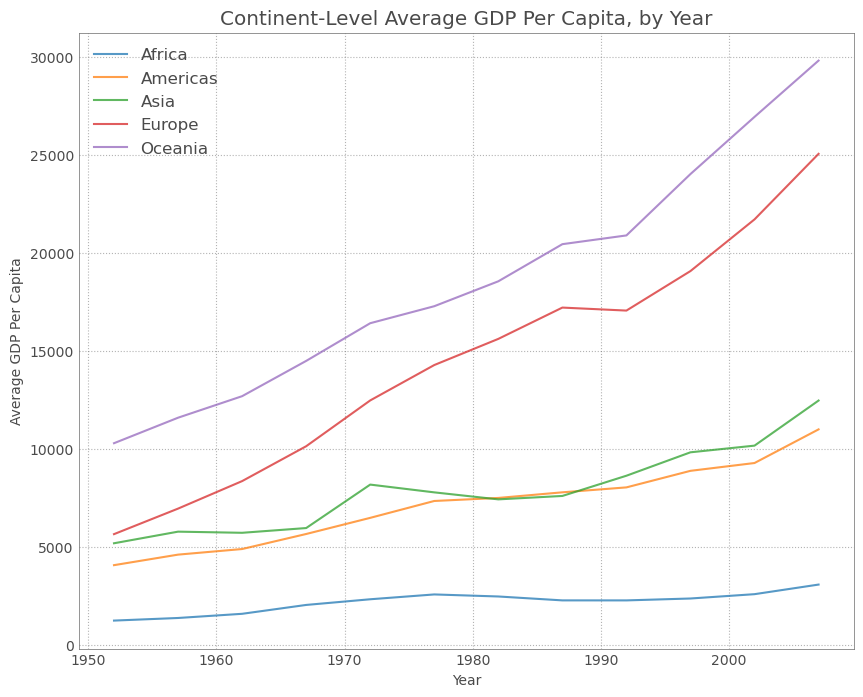

In [76]:
plt.figure(figsize=(10, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

What's changed? Do you like this look better?

#### Style Sheets

Style sheets are built-in collections of rc parameters that allow for a quick and easy way to get nice looking plots in a particular style. To use a style sheet you simply call the `plt.style.use()` function and give it the name of the style sheet you want to use. Let's try to use the "Five Thirty Eight" style sheet, the name of which you might recognize as Nate Silver's website, of New York Times data visualization fame.

For more on style sheets print all available style sheets using `plt.style.available`, or see the ([documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html)).

In [77]:
plt.style.use('fivethirtyeight')

Now we'll use the same code again, and see how it has changed!

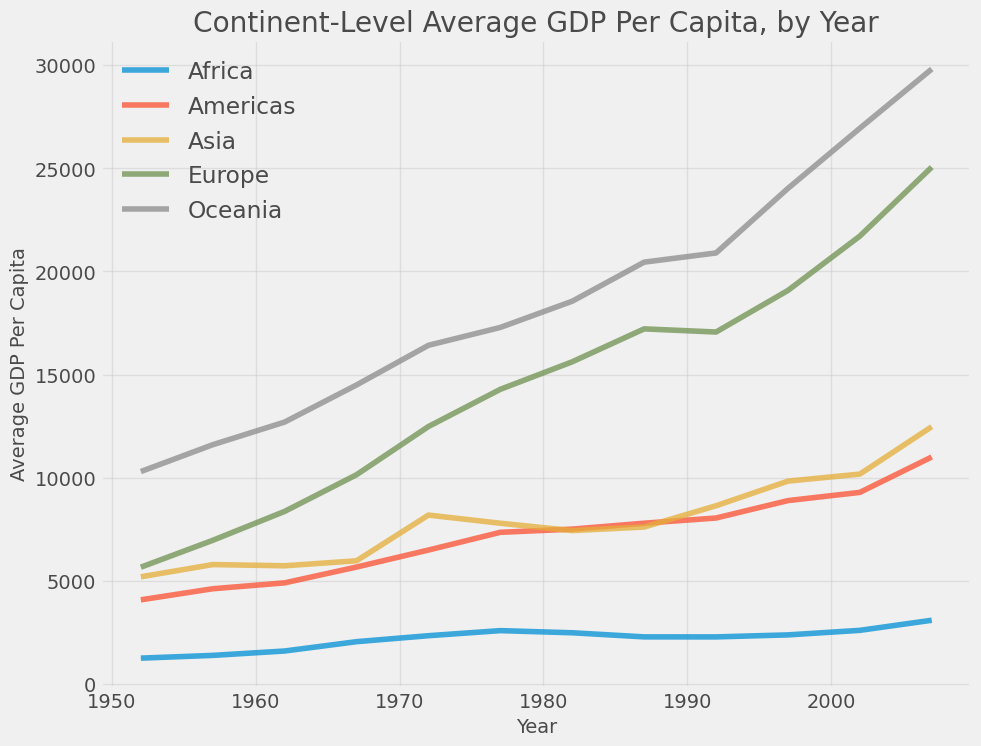

In [78]:
plt.figure(figsize=(10, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

## Seaborn

"`Seaborn` is a Python visualization library based on `Matplotlib`. It provides a high-level interface for drawing attractive statistical graphics."

Let's import it and give it the alias `sns`, which is done by convention.

In [79]:
import seaborn as sns
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

The `sns.set()` function allows us to change some of the `rcParams`. Here, we're changing the plot's face color.

`seaborn` has the capacity to create a large number of informative, beautiful plots very easily. Here we'll review several types, but please visit their [gallery](https://seaborn.pydata.org/examples/index.html) for a more complete picture of all that you can do with `seaborn`.

### Boxplots Revisited
We previously looked at boxplots in `matplotlib`. Let's now use `seaborn` to look at the distributions of life expectancies separately for each continent. 

`Seaborn` includes native support for `pandas` data structures. To use it we specify the `DataFrame` we want to take the data from in the `data` parameter. We then specify which column names (or variables) from that `DataFrame` to use for in `x` and `y`. `x` specifies the variable to groupby, and `y` specifies the variable whose distribution should be plotted.

We'll plot the continents in alphabetical order by specifying the `order=` parameter, make the box face colors all white using `color='white'`, and disable drawing of the fliers (or outliers) using `fliersize=0`.

In addition to the boxplot, we'll plot a **stripplot**, which overlays a scatter plot of all the data points over each box. In combination, they're quite useful for understanding distributions. This takes many of the same parameters as the boxplot did, with the exception of `jitter=True` which causes the scatter markers to be slightly jittered horizontally. 

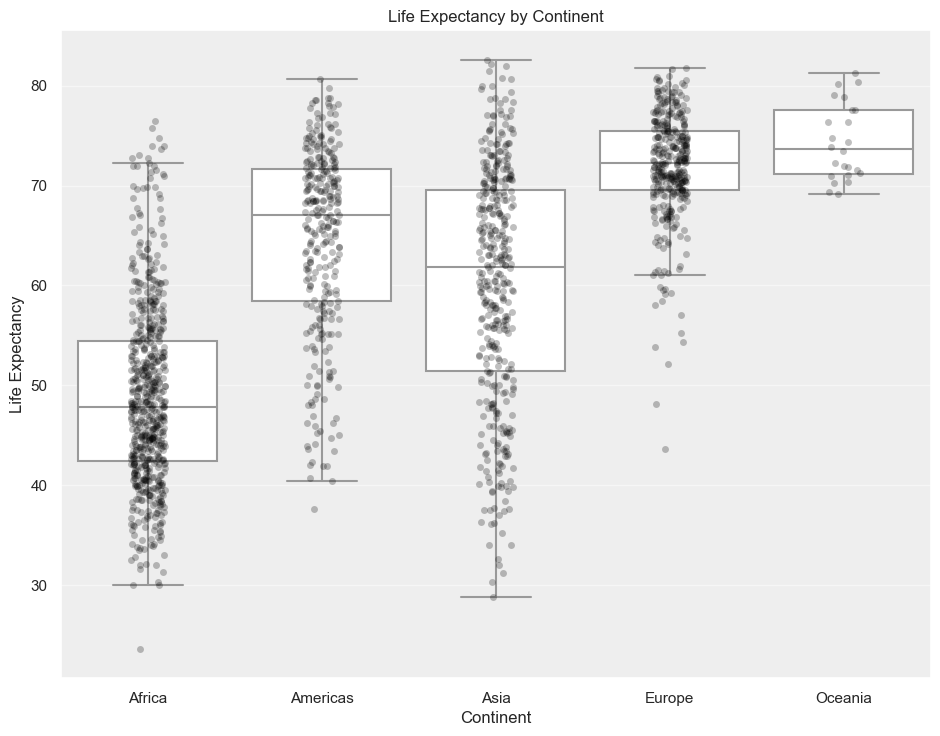

In [80]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="continent", y="lifeExp", data=gm,
            order=np.sort(gm.continent.unique()),
            color='white', fliersize=0)
sns.stripplot(x="continent", y="lifeExp", data=gm,
              order=np.sort(gm.continent.unique()),
              alpha=0.25, size=5, jitter=True,
              color='Black', edgecolor='Black')

plt.title("Life Expectancy by Continent")
plt.xlabel('Continent')
plt.ylabel('Life Expectancy');

With just a few lines of code we have a very nice looking plot using `seaborn`. It's possible to create a stripplot using `Matplotlib`, but it's not as easy as it is with `Seaborn`.

### Heatmaps 
`Seaborn` can be used to create Heatmaps which are helpful visualizations when we would like to plot three variables, one continuous and two factors in which a color scale is created to highlight the magnitude of the continuous variable.

We will revisit our `per_continent_mean_gdp` dataset that outlines the average per-capita GDP across time for each continent to create our heatmap. 

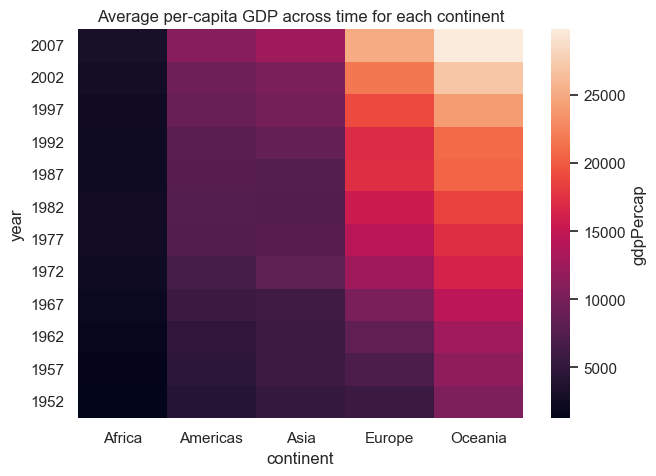

In [81]:
heatmap = per_continent_mean_gdp.pivot(index="year", 
                                       columns="continent", 
                                       values="gdpPercap")
heatmap = heatmap.sort_index(ascending=False)
heatmap_graph = sns.heatmap(heatmap,
           cbar_kws = {'label' : "gdpPercap"})

plt.title("Average per-capita GDP across time for each continent");

### Regression Plots

While `seaborn` provides easy ways to make nice-looking plots, it is ultimately a package built for statistical data visualization. It includes many useful built-in plots, such as the following **regression plot**. Here all the data values are plotted using a scatter plot, and a regression line is fit, and plotted, over that data. 

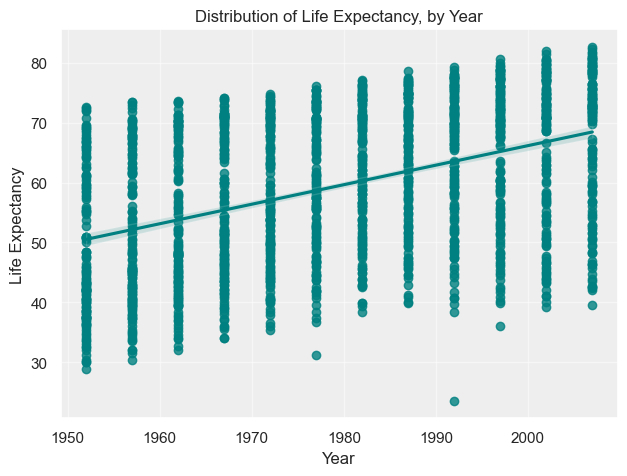

In [82]:
sns.regplot(x='year', y='lifeExp', data=gm, color='teal')

plt.title('Distribution of Life Expectancy, by Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy');

### Kernel Density Plots

We learned earlier that histograms can be used to visualize the discretized distribution of a variable. We must specify the number of bins in a histogram and as a result the shape of the distribution can change wildly depending on that somewhat arbitrary choice.

A better way to plot a distribution is to estimate it's kernel density and plot it using `sns.kdeplot()`. Let's plot the kernel density for per-capita GDP in 2007 as we did earlier using a histogram. In fact, let's plot the two side by side using subplots.

/var/folders/sy/_bbz4lwx7j79hkfq676xt87m0000gn/T/ipykernel_42626/1215864247.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gm_latest['gdpPercap'], shade=True)


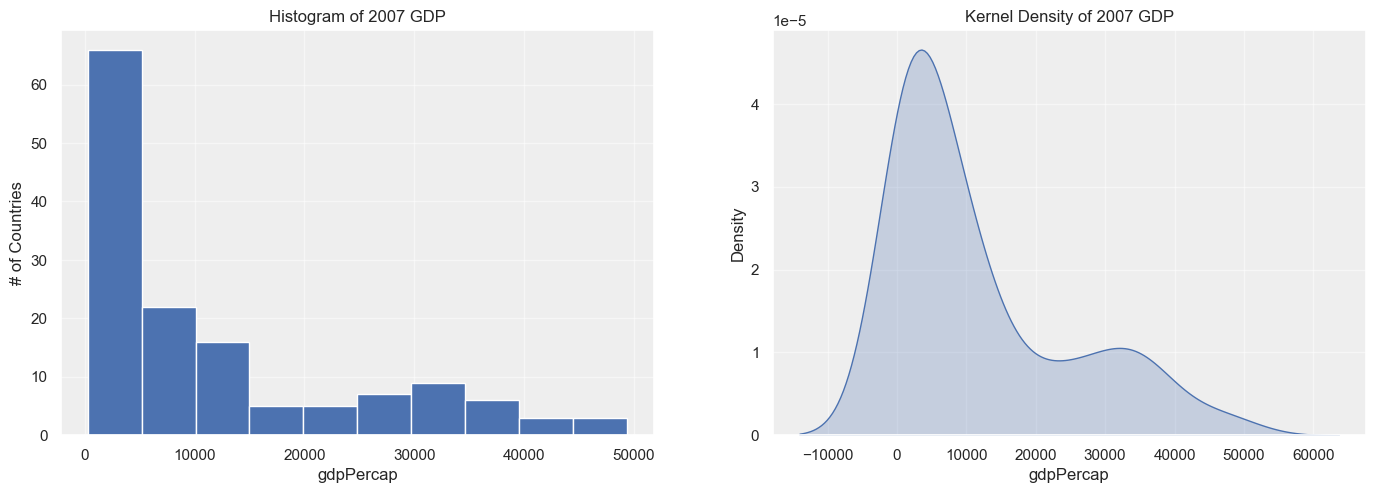

In [83]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(gm_latest['gdpPercap'])
plt.xlabel('gdpPercap')
plt.ylabel("# of Countries")
plt.title('Histogram of 2007 GDP')

plt.subplot(1, 2, 2)
sns.kdeplot(gm_latest['gdpPercap'], shade=True)
plt.title('Kernel Density of 2007 GDP');

### Joint Distribution Plots

We've already used scatter plots to visualize the relationship between two variables. It is sometimes useful to not only see the relationship between the two variables, but to visualize each variables respective distribution. The `sns.jointplot` function in `seaborn` let's you do just that.

Let's compare the log of per-capita GDP and life expectancy in a joint distribution plot.

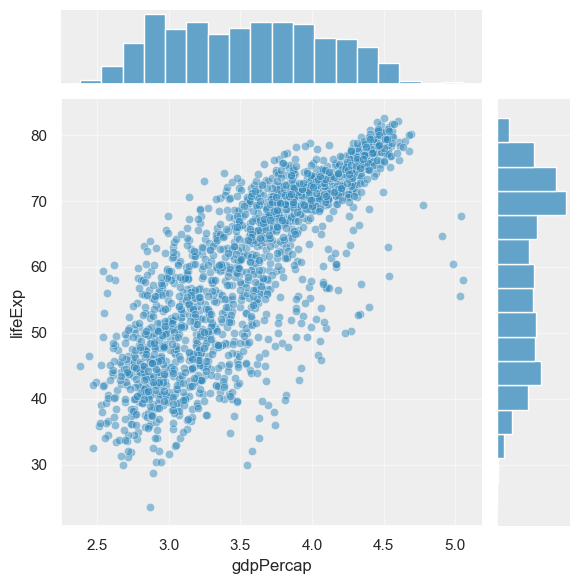

In [84]:
sns.jointplot(x=np.log10(gm['gdpPercap']), y=gm['lifeExp'], color="#348ABD", alpha=0.5);

### Caveats

It's important to note that a side effect of importing `seaborn` is that it changes *all* plot styles. For example, if you wanted to create the same line plot of Portugal's GDP over time using `matplotlib`, it would now look like the following since we've already imported searborn.

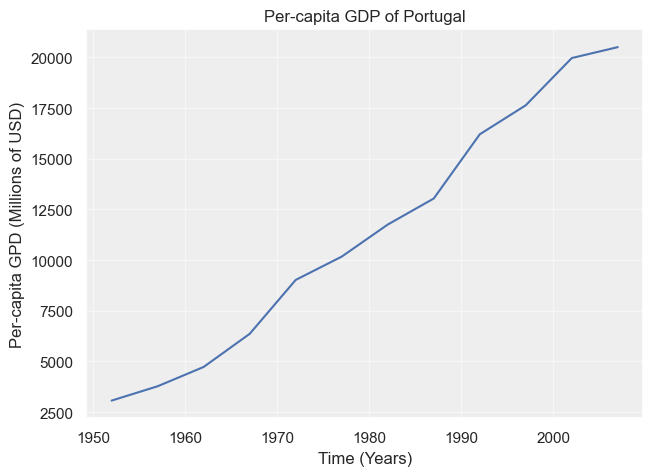

In [85]:
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)');

### `FacetGrid`

In the previous `matplotlib` section we used `subplots` to make continent-specific scatter plots of per-capita GDP vs. life expectancy. Let's see how much easier that can be done using the `FacetGrid` in `seaborn`.

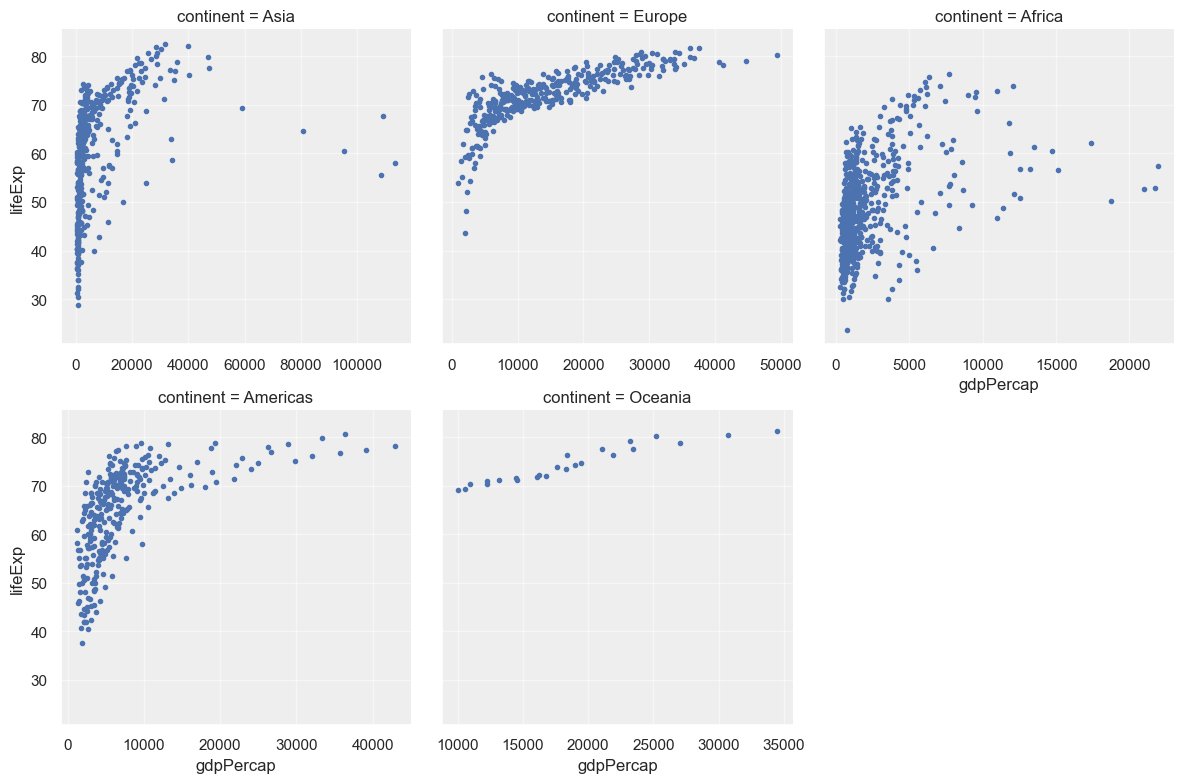

In [86]:
g = sns.FacetGrid(gm, col='continent', col_wrap=3, height=4, sharex=False)
g.map(plt.scatter, 'gdpPercap', 'lifeExp', marker='.');

That's pretty good, and quick. We are missing the color coding based on year however. To add this capability, and to shorten the code even further, we'll use a `relplot`, or relational plot.

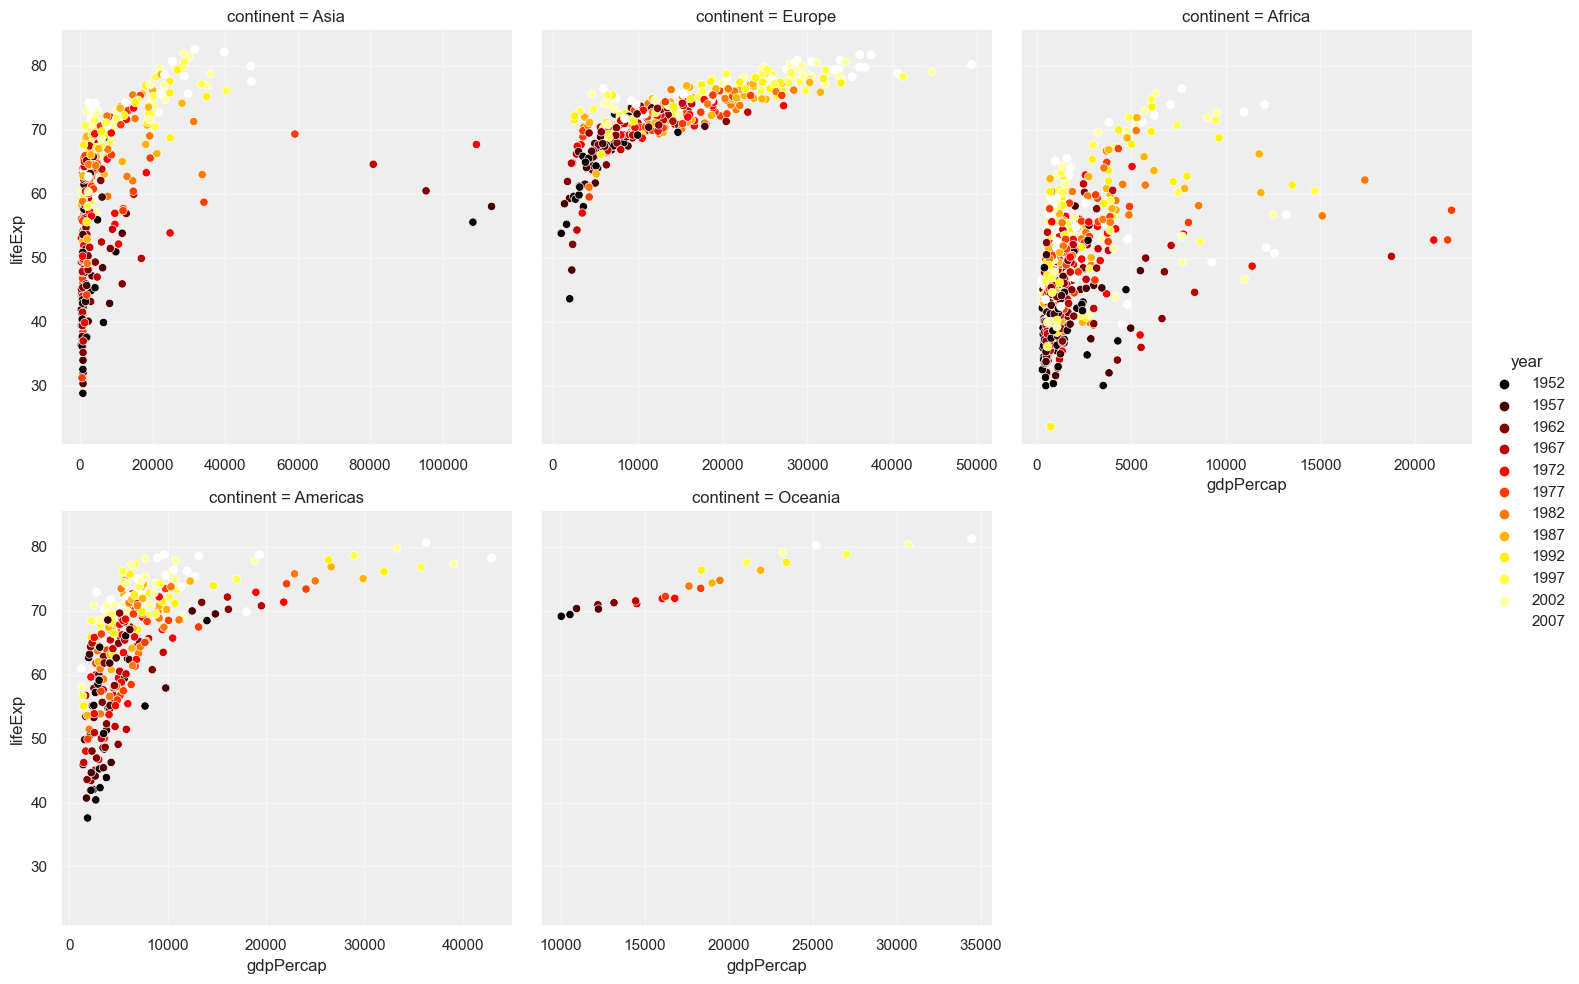

In [87]:
sns.relplot(x='gdpPercap', 
            y='lifeExp', 
            hue='year', 
            col='continent', 
            col_wrap=3, 
            palette='hot', 
            legend='full',
            kind='scatter',
            facet_kws={'sharex':False},
            data=gm);

You can also use `sns.relplot` for line plots. In fact, many `seaborn` plots can be easily plotted using a FacetGrid using another plotting function, just as `relplot` integrates a `FacetGrid` with either a `scatter` or `line` plot. See the [API documentation](https://seaborn.pydata.org/api.html) for more details.

## Saving Plots

Finally, if you'd like to save a plot you can use the `plt.savefig` function that is part of the matplotlib package. This will create an image file saved to wherever you specify. Running the cell below will save the plot as `facetgrid_graph.png` within your current directory. Refer to `help(plt.savefig)` for more documentation on this function.

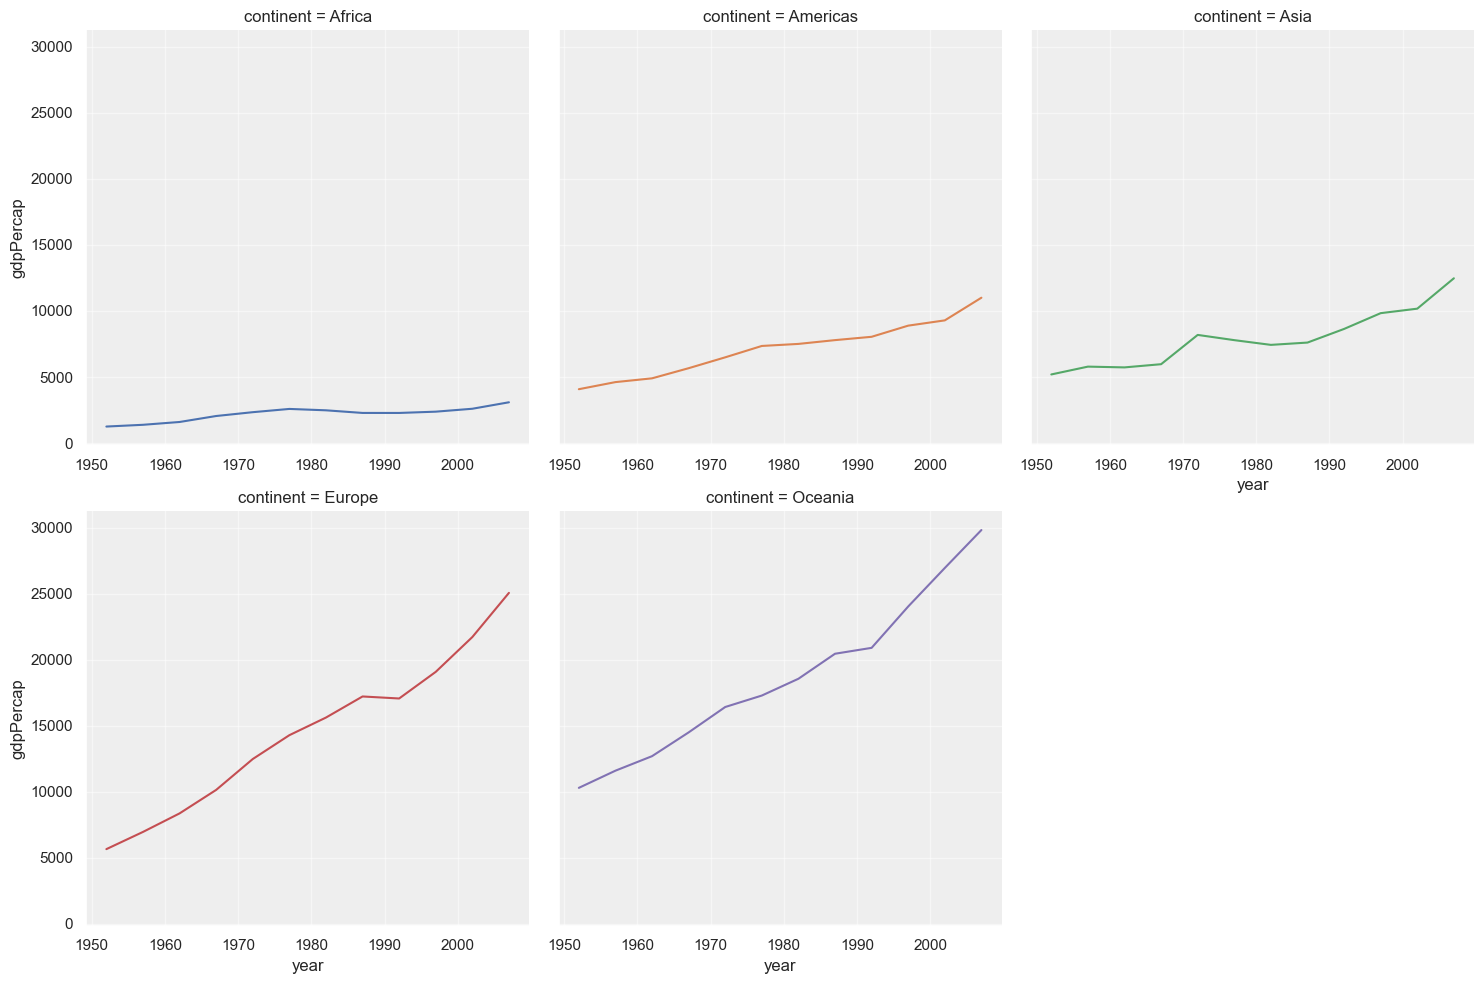

In [88]:
sns.relplot(x='year', 
            y='gdpPercap', 
            hue='continent',
            col='continent', 
            col_wrap=3, 
            legend=None,
            kind='line',
            facet_kws={'sharex':False},
            data=per_continent_mean_gdp);
plt.savefig('facetgrid_graph.png')

## Going further

There are many visualization libraries in Python and you now have experience in using two popular ones.

Several other Python visualization libraries exist for creating *interactive* visualizations such as [Plotly](https://plot.ly/python/), [Bokeh](http://bokeh.pydata.org/en/latest/), or [Toyplot](http://toyplot.readthedocs.org/en/stable/tutorial.html#getting-started).